<a href="https://colab.research.google.com/github/CarolineOlive/Projetos-Bootcamp/blob/master/Caroline_Oliveira_Projeto_Final_Bootcamp_Data_Science_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

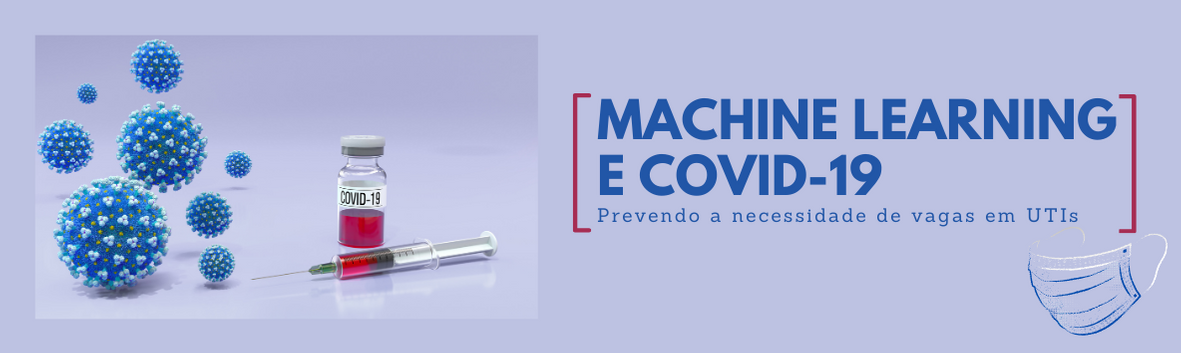

# **Projeto Final | Bootcamp Data Science 2021 - Alura**





Autora: Caroline Silva de Oliveira

E-mail: karolsilvaoliveira@yahoo.com.br

LinkedIn: www.linkedin.com/in/caroline-oliveira-quim

Github: https://github.com/CarolineOlive/Projetos-Bootcamp

**CONTEXTUALIZAÇÃO**

O surto de síndrome respiratória aguda grave coronavírus 2 (SARS-CoV-2) ou doença coronavírus 2019 (COVID-19) originada na China, se espalhou para o resto do mundo, levando a Organização Mundial de Saúde (OMS) a classificá-la como uma pandemia global [1]. 

A COVID-19 foi relatada pela primeira vez no Brasil em fevereiro de 2020 e o país rapidamente se tornou um dos mais afetados globalmente. No início de abril, o vírus começou a se espalhar pelas favelas de São Paulo e Rio de Janeiro, e o perfil do paciente mudou. Pessoas com menos de 50 anos foram hospitalizadas e morreram em taxas mais elevadas do que na Europa, China e EUA, sugerindo que a extrema desigualdade e a pobreza aumentam a vulnerabilidade à doença. Em países com poucos recursos, pessoas que poderiam ter sobrevivido em outros lugares estão morrendo de COVID-19 [2].

COVID-19 se espalha principalmente pelo trato respiratório. Estudos já confirmaram a transmissão de pessoa para pessoa como a principal via de disseminação. Pacientes com COVID-19 com histórico de doenças como doenças do sistema respiratório, deficiência imunológica, diabetes, doenças cardiovasculares e câncer são propensos a eventos adversos (admissão em unidade de terapia intensiva com necessidade de ventilação invasiva ou até morte)[1]. 

O foco atual tem sido o desenvolvimento de novos métodos terapêuticos, incluindo antivirais, anticorpos monoclonais e vacinas [1]. No entanto, embora haja sem dúvida uma necessidade urgente de identificar opções de tratamento eficazes contra a infecção com COVID-19, é igualmente importante a obtenção de dados precisos para melhor prever e preparar os sistemas de saúde e evitar colapsos, definido pela necessidade de leitos de UTI acima da capacidade (assumindo que recursos humanos, EPIs e profissionais estejam disponíveis) [3].


1. Kooshkaki, O., Derakhshani, A. et al. Disease 2019: A Brief Review of the Clinical Manifestations and Pathogenesis to the Novel Management Approaches and Treatments, Front. Oncol., 10, 2020. <https://www.frontiersin.org/article/10.3389/fonc.2020.572329> Acesso em: 23 Abr 2021.

2. Ponce, D. The impact of coronavirus in Brazil: politics and the pandemic. Nat Rev Nephrol, 16, 483, 2020. <https://www.nature.com/articles/s41581-020-0327-0#citeas> Acesso em: 23 Abr 2021.

3. COVID-19 - Clinical Data to assess diagnosis. <https://www.kaggle.com/S%C3%ADrio-Libanes/covid19> Acesso em: 08 Fev 2021.

**OBJETIVO**

O projeto desenvolvido teve como objetivo prever quais pacientes precisarão ser admitidos na unidade de terapia intensiva, usando dados clínicos individuais,  e assim, definir qual a necessidade de leitos de UTI do hospital, a partir dos dados clínicos individuais disponíveis. Para tal, foram construidos modelos com as técnicas de Machine Learning.

Os dados utilizados foram disponibilizados no kaggle pelo time de ciência de dados do Hospital Sírio Libanês e podem ser acessados por este [link](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19).

**ESTRUTURA DO PROJETO**

O projeto foi desenvolvido seguindo as recomendações do time do hospital Sírio-Libanês:

* Cuidado para **não** usar os dados quando a variável de destino estiver presente, pois a ordem do evento é desconhecida (talvez o evento de destino tenha acontecido antes de os resultados serem obtidos). Eles foram mantidos lá para que possamos aumentar este conjunto de dados em outros resultados posteriormente.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1591620%2F77ca2b4635bc4dd7800e1c777fed9de1%2FTimeline%20Example%20No.png?generation=1594740873237462&alt=media)

* A identificação precoce dos pacientes que desenvolverão um curso adverso da doença (e precisam de cuidados intensivos) é a chave para um tratamento adequado (salvar vidas) e para gerenciar leitos e recursos. Portanto, um bom modelo preditivo usando apenas a primeira janela de tempo (0-2) provavelmente será mais clinicamente relevante. 

* Atenção às medidas repetidas em indivíduos, uma vez que esses valores são (positivamente) correlacionados.


O banco de dados é composto por 54 variáveis, contendo informações demográficas, doenças pré-existentes, resultados de exames de sangue e sinais vitais.





**ETAPAS | RESUMO**

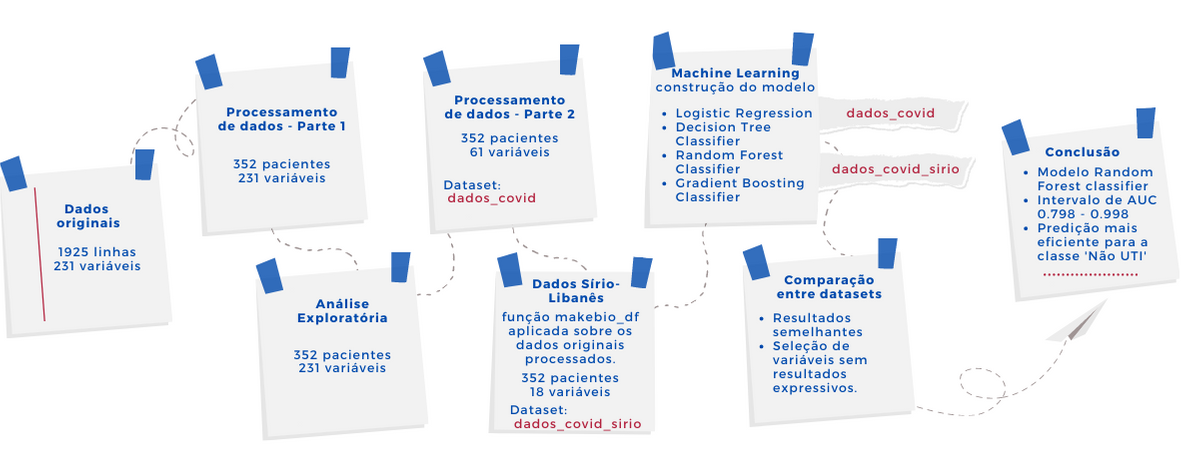


## **Importando Bibliotecas**

---



In [1]:
import pandas as pd

#Importando bibliotecas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from statsmodels.stats.weightstats import ztest

#importando as bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Funções**

In [2]:
'''
função para preencher os dados faltantes, agrupar as features e agrupar todos em um novo dataset
'''

def preenche_tabela(dados):

    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill') 
    
    features_categoricas = dados.iloc[:, :13]
    features_categoricas_saída = dados.iloc[:, -2:]

    dados_finais = pd.concat([features_categoricas, features_continuas, features_categoricas_saída], ignore_index=True, axis=1)
    dados_finais.columns = dados.columns

    return dados_finais

In [3]:
'''
remover os pacientes que foram para a UTI (UCI == 1) na janela '0-2'
'''

def remove_paciente_uci_inicio(dados):

  pacientes_a_remover = dados.query("ICU == 1 and WINDOW == '0-2'")["PATIENT_VISIT_IDENTIFIER"].values

  dados_finais = dados.query("PATIENT_VISIT_IDENTIFIER not in @pacientes_a_remover")

  return dados_finais

In [4]:
'''
Função que recebe as linhas os dados de UCI de cada paciente e atribui à janela '0-2'
Caso o paciente tenha ido para UTI em algum momento, é atribuído o valor de UCI == 1; caso contrário, UCI == 0.
'''

def prepare_window(rows):
    if(np.any(rows['ICU'])):
        rows.loc[rows["WINDOW"] == "0-2", "ICU"] = 1

    return rows.loc[rows["WINDOW"] == "0-2"]

In [5]:
'''
Função que agrupa os dados por paciente, em uma mesma linha
'''

def agrupa_paciente(dados):
  
  dados_finais = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).apply(prepare_window)
  dados_finais = dados_finais.reset_index(drop=True)

  return dados_finais

In [6]:
'''
Processamento - Função que combina as funções anteriores para processamento dos dados
'''

def limpa_dados(dados):

  dados1 = preenche_tabela(dados)
  dados2 = remove_paciente_uci_inicio(dados1)
  dados_finais = agrupa_paciente(dados2)

  return dados_finais

In [7]:
'''
Função cria gráficos do tipo boxplot de acordo com a variável selecionada para mostrar a distribuição dos dados de acordo com admissão ou não à UTI.
Dados separados por gênero dos pacientes.
'''

def cria_boxplot(dados, variavel, titulo):

  sns.boxplot(x="GENDER", y=variavel, hue="ICU", data=dados, palette=["blue", "dodgerblue"])

  plt.title(titulo, fontsize = 12, fontweight = "bold")
  plt.xlabel("")
  plt.ylabel("")

  plt.tick_params(axis="x", labelsize=12)
  plt.tick_params(axis="y", labelsize=12)

  labels = [item.get_text() for item in ax.get_xticklabels()]
  labels[0] = 'Masculino'
  labels[1] = 'Feminino'
  ax.set_xticklabels(labels)
  plt.xticks(rotation=90)


In [8]:
'''
Função roda o teste Z para avaliar se há diferença significativa entre as features, separadas por gênero, e retorna os valores de p-value para os dois grupos.
'''

def teste_significancia(dados, feature):

  descricao_feature_m_not_uti = dados_covid_preproc.query("GENDER == 0 and ICU == 0")[feature]
  descricao_feature_m_uti = dados_covid_preproc.query("GENDER == 0 and ICU == 1")[feature]
  descricao_feature_f_not_uti = dados_covid_preproc.query("GENDER == 1 and ICU == 0")[feature]
  descricao_feature_f_uti = dados_covid_preproc.query("GENDER == 1 and ICU == 1")[feature]

  _ , p_value_m = ztest(descricao_feature_m_not_uti, descricao_feature_m_uti) #grupo gênero masculino
  _ , p_value_f = ztest(descricao_feature_f_not_uti, descricao_feature_f_uti) #grupo gênero feminino

  return print(f'Masculino {p_value_m} \nFeminino {p_value_f}')


In [9]:
'''
Função que aplica a função 'teste_significancia' para as features selecionadas e retorna os resultados obtidos para cada uma em uma mesma célula.
'''

def resultado_teste_significancia_features(dados):

  print(f'Diferença significativa definidas por p-value <= 0.05. Resultados:')
  print(f'PCR')
  teste_significancia(dados, "PCR_MEAN")
  print(f'CREATINA')
  teste_significancia(dados, "CREATININ_MEAN")
  print(f'NEUTRÓFILOS')
  teste_significancia(dados, "NEUTROPHILES_MEAN")
  print(f'LINFÓCITOS')
  teste_significancia(dados, "LINFOCITOS_MEAN")
  print(f'PRESSÃO ARTERIAL SISTÓLICA')
  teste_significancia(dados, "BLOODPRESSURE_SISTOLIC_MEAN")
  print(f'PRESSÃO ARTERIAL DIASTÓLICA')
  teste_significancia(dados, "BLOODPRESSURE_DIASTOLIC_MEAN")
  print(f'SATURÇÃO DE OXIGÊNIO')
  teste_significancia(dados, "OXYGEN_SATURATION_MEAN")
  print(f'FREQUÊNCIA CARDÍACA')
  teste_significancia(dados, "HEART_RATE_MEAN")
  print(f'FREQUÊNCIA RESPIRATÓRIA')
  teste_significancia(dados, "RESPIRATORY_RATE_MEAN")


In [10]:
'''
Função que converte transformando as strings em dados categóricos (.astype("category")) e criando um código para cada categoria (.cat.codes)
'''

def converte_age_percentil(dados):
  dados.AGE_PERCENTIL = dados.AGE_PERCENTIL.astype("category").cat.codes

  return dados

In [11]:
'''
Função que aplica o get_dummies para converter variável categórica em variável indicadora (binária)
'''

def converte_variavel_categorica_binaria(dados):
  
  dados_age_percentil = pd.get_dummies(dados[["AGE_PERCENTIL"]]) 

  dados_finais = pd.concat([dados_age_percentil, dados], axis=1)

  return dados_finais

In [12]:
'''
Função que exclui colunas do dataset usando uma parte do nome como referencia, passada por uma lista contendo as partes dos nomes.
'''

def excluir_colunas(referencia, dados):
  
  colunas = []
  for referencia in referencia:
    for coluna in dados.columns:
      if coluna.endswith(referencia):
        colunas.append(coluna)
 
  return dados.drop(colunas, axis=1)

In [13]:
'''
Função que remove as variáveis com alta correlação do conjunto de dados
'''

def remove_corr_var(dados, valor_corte):

  matrix_corr = dados.iloc[:, 4:-1].corr().abs() #cria a matriz de correlação
  matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool))
  excluir = [coluna for coluna in matrix_corr.columns if any(matrix_upper[coluna] > valor_corte)]

  return dados.drop(excluir, axis=1)

In [14]:
'''
Função criada pelo time do Hospital Sírio libânes para criar novas features e selecionar aquelas consideradas de maior interesse do ponto de vista biológico.
'''

def makebio_df(df:pd.DataFrame):

    df["BLOODPRESSURE_ARTERIAL_MEAN"] = (df['BLOODPRESSURE_SISTOLIC_MEAN'] + 2*df['BLOODPRESSURE_DIASTOLIC_MEAN'])/3
 
    df["NEUTROPHILES/LINFOCITOS"] = df['NEUTROPHILES_MEAN']/df['LINFOCITOS_MEAN']

    df["GASO"] = df.groupby("PATIENT_VISIT_IDENTIFIER").P02_ARTERIAL_MEAN.apply(lambda x: x.fillna(method='ffill'))
    df["GASO"] = (~df["GASO"].isna()).astype(int)

    return df[["ICU","WINDOW",
               "PATIENT_VISIT_IDENTIFIER",
               "AGE_ABOVE65", 
               "GENDER", 
               "BLOODPRESSURE_ARTERIAL_MEAN", 
               "RESPIRATORY_RATE_MAX", 
               "HTN", 
               'DISEASE GROUPING 1',
               'DISEASE GROUPING 2',
               'DISEASE GROUPING 3',
               'DISEASE GROUPING 4',
               'DISEASE GROUPING 5',
               'DISEASE GROUPING 6',
               "GASO",
               "OXYGEN_SATURATION_MIN",
               "HEART_RATE_MAX",
               "PCR_MEAN",
               "CREATININ_MEAN"]]


In [15]:
'''
Função criada para rodar os modelos escolhidos aplicando validação cruzada e retornar como resultado os valores de AUC médio.
'''
def roda_modelos_cv(modelo, dados, n_splits, n_repeats):
  
    np.random.seed(73246)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU"], axis=1)
    
    #uso do repeated stratfied kfold e validação cruzada para dividir os dados em treino e teste
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)
    
    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])
    auc_std = np.std(resultados['test_score'])

    print(f'AUC {auc_medio} - {auc_medio_treino}')
    return auc_medio, auc_medio_treino

In [16]:
'''
Função criada para gerar as métricas 'classification report' e 'matrix de confusão' para cada modelo testado.
'''

def visualiza_metricas(dados, modelo):

  #separando os dados de entrada e saída
  np.random.seed(73246)
  dados = dados.sample(frac=1).reset_index(drop=True)
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU"], axis=1)

  #Separando os dados de treino e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

  #treinando o modelo
  modelo.fit(x_train, y_train)
  predic = modelo.predict(x_test)

  #report das metricas para avaliação do modelo
  classes = ["Não UTI", "UTI"]
  print(classification_report(y_test, predic, target_names=classes, zero_division=0))

  #Plot da matrix de confusão
  plot_confusion_matrix(modelo, x_test, y_test, display_labels=classes, cmap=plt.cm.Blues)

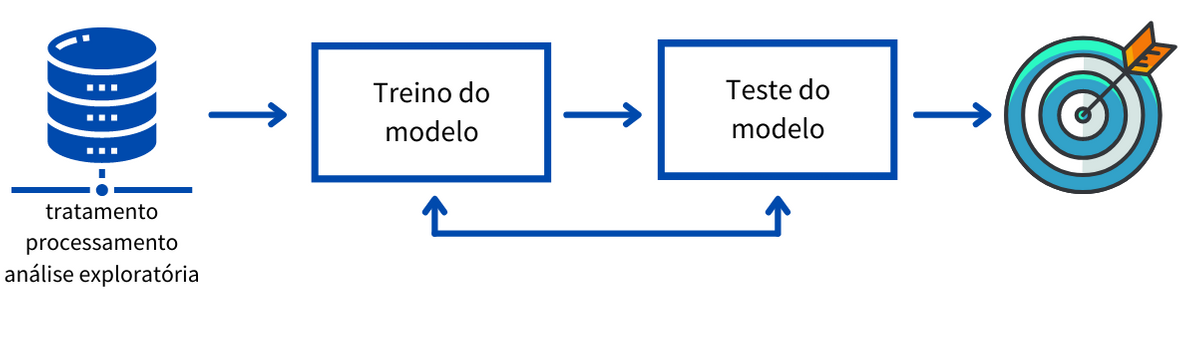

## **Dados originais**

In [17]:
#importando os dados
dados = pd.read_excel("/content/drive/MyDrive/Bootcamp Data Science/Projeto final/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

O dataset trás dados de pacientes que deram entrada no hospital Sírio Libanês e permaneceram por diferentes períodos de tempo, os quais são especificados na coluna 'WINDOW'. Assim, a coluna 'PATIENT_VISIT_IDENTIFIER' mostra um indicador único para cada pacientes, sendo este o mesmo para as diferentes janelas.

In [18]:
linha, coluna = dados.shape
print(f"O conjunto de dados possui {linha} linhas e {coluna} colunas (variáveis).")

O conjunto de dados possui 1925 linhas e 231 colunas (variáveis).


Apesar do haver 1925 linhas no dataset, o número de pacientes é menor, visto que para cada pacientes há diversos dados de janelas de tempo diferentes.

In [19]:
#Identificando a quantidade de pacientes que deram entrada no hospital
num_pacientes = len(dados["PATIENT_VISIT_IDENTIFIER"].unique())
print(f"No conjunto de dados há informações de {num_pacientes} pacientes.")

No conjunto de dados há informações de 385 pacientes.


In [20]:
dados.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

In [21]:
#verificando a existencia de pacientes que foram para UTI já na primeira janela (ICU == 1 e 'WINDOW' == 0-2)
dados.query('WINDOW == "0-2" and ICU == 1')

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.283951,-0.046154,1.886792e-01,0.830508,-0.107143,1.000000,-0.283951,-0.046154,1.886792e-01,0.862069,-0.107143,1.000000,-0.072165,0.1500,0.264957,1.000000,0.318681,1.000000,-0.504274,-0.329730,-0.059701,0.636364,-0.275362,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
85,17,0,40th,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.135802,0.153846,-5.471698e-01,-0.525424,-0.071429,0.947368,0.135802,0.153846,-5.471698e-01,-0.517241,-0.071429,0.947368,0.278351,0.3125,-0.401709,-0.428571,0.340659,0.979798,-0.213675,-0.189189,-0.641791,-0.575758,-0.246377,0.947368,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
135,27,1,60th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,1
205,41,1,70th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,1
235,47,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.209877,-0.230769,1.320755e-01,-0.050847,0.107143,0.789474,-0.209877,-0.230769,1.320755e-01,-0.034483,0.107143,0.789474,-0.010309,0.0000,0.213675,0.071429,0.450549,0.919192,-0.452991,-0.459459,-0.104478,-0.151515,-0.101449,0.789474,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
240,48,0,60th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.456790,0.307692,9.433962e-02,0.016949,-0.035714,NaN,0.456790,0.307692,9.433962e-02,0.03448

In [22]:
#verificando se há dados faltantes
dados.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

#### Observações iniciais
* A avaliação do conjunto de dados inicial mostrou que há 1925 linhas e, apenas, 385 pacientes.
* Há diversos pacientes que foram para UTI (UCI == 1) já primeira janela 0-2. Seguindo a orientação descrita no pelo time do Sírio-Libanês, estes devem ser removidos.
* Há, também, diversos dados faltantes, os quais deve ser tratados seguindo a recomendação do Sírio Libanês.

  >"É razoável supor que um paciente que não tem uma medição registrada em uma janela de tempo esteja clinicamente estável, podendo apresentar sinais vitais e exames laboratoriais semelhantes às janelas vizinhas. Portanto, pode-se preencher os valores ausentes usando a entrada seguinte ou anterior. Atenção aos problemas de multicolinearidade e variância zero nesses dados ao escolher seu algoritmo". (Time Sírio-Libanês)





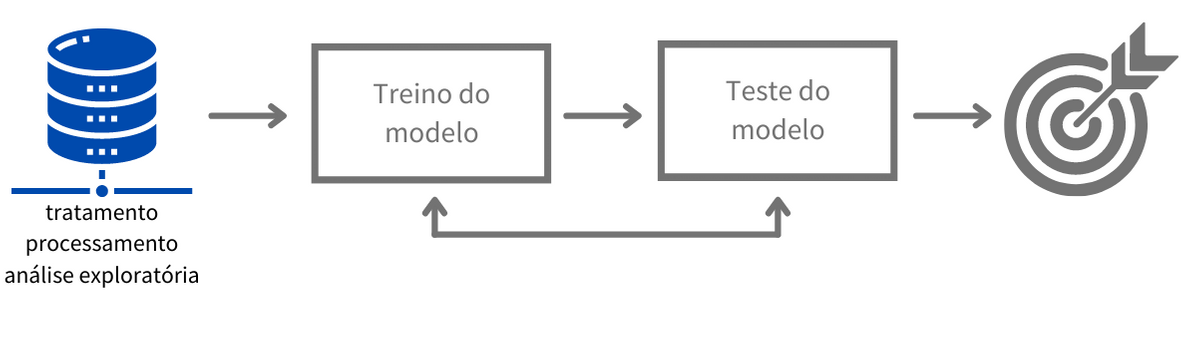

### Processamento dos dados - Parte 1



Seguindo a recomendação do Sírio-Libanês descritas no Kaggle, trabalharei apenas com a primeira janela (0-2) para analisar os dados e criar o modelo preditivo, visto que obter um modelo que consegue prever a necessidade de UTI já nas primeiras 2 horas de permanência no hospital é clinicamente relevante.

In [23]:
#Aplicando a função para processamento inicial dos dados
dados_covid_preproc = limpa_dados(dados)
dados_covid_preproc.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
2,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
4,5,0

A função fez o preenchimento de dados faltantes no dataset, removeu os pacientes com ICU == 1 já na primeira janela, concentrou as informações na janela 0-2, deixando apenas um identificador único para cada paciente.

In [24]:
#Conferindo se os dados de ICU == 0 permanecem no dataset após o processamento
dados_covid_preproc.query("ICU == 0")

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
2,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,...,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,...,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.00000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
4,5,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-1.000000,-1.0,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.037037,-0.538462,-0.537736,-0.517241,-0.196429,0.815789,0.030928,-0.3750,-0.401709,-0.428571,0.252747,0.919192,-0.247863,-0.567568,-0.626866,-0.575758,-0.333333,0.842105,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.86087,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
5,6,1,70th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.978029,-1.0,-0.209877,-0.446154,-0.415094,-0.593220,0.178571,0.894737,-0.209877,-0.446154,-0.415094,-0.586207,0.178571,0.894737,-0.010309,-0.1750,-0.282051,-0.500000,0.494505,0.959596,-0.452991,-0.610811,-0.537313,-0.636364,-0.043478,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000

In [25]:
#avaliando se ainda há dados vazios
(dados_covid_preproc.isna().sum()).value_counts()

0    222
1      9
dtype: int64

In [26]:
#removendo os 9 dados vazios restantes
dados_covid_preproc = dados_covid_preproc.dropna()

In [27]:
dados_covid_preproc.shape

(352, 231)

### Análise exploratória

* **Informações demográficas - Faixa etária, gênero e idade acima de 65 anos**



**Pacientes por faixa etária**

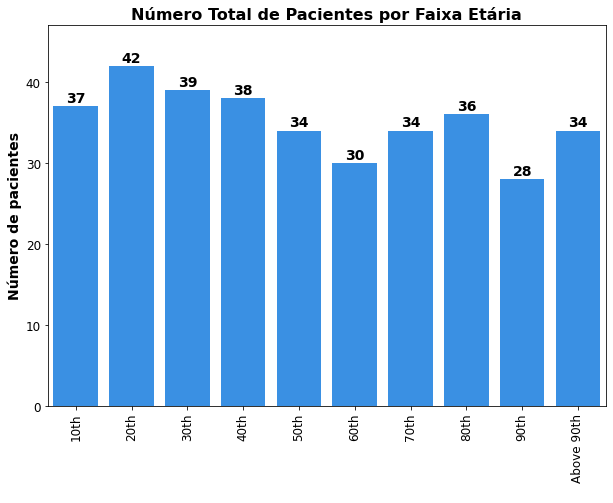

In [28]:
#visualizando os dados de pacientes por faixa etária
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="AGE_PERCENTIL", data=dados_covid_preproc.sort_values('AGE_PERCENTIL', ascending = True), color='dodgerblue')
plt.title("Número Total de Pacientes por Faixa Etária", fontsize = 16, fontweight = "bold")
plt.xlabel(" ")
plt.ylabel("Número de pacientes",fontsize = 14, fontweight = "bold")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xticks(rotation=90)
plt.ylim(0, 47)

for indice, p in enumerate(ax.patches):
  ax.text(x=indice, y=p.get_height()+.5, s=str(p.get_height()), ha='center', fontsize=14, fontweight="bold")

plt.show()

O gráfico mostra que o número de pacientes por faixa etária está relativamente bem distribuido, não havendo grande diferenças que podem interferir consideravelmente no desempenho de um modelo de machine learning.

In [29]:
#Aplicando a função crosstab pra separar os dados de adimissão ou não à UTI por faixa etária
paciente_uti_crosstab = pd.crosstab(index=dados_covid_preproc["AGE_PERCENTIL"], columns=dados_covid_preproc["ICU"],
                                 values=dados_covid_preproc["ICU"], aggfunc="count")
paciente_uti_crosstab.rename(columns= {0: "Não UTI", 1: "UTI"}, inplace = True)
paciente_uti_crosstab

ICU,Não UTI,UTI
AGE_PERCENTIL,,
10th,30,7
20th,31,11
30th,23,16
40th,25,13
50th,18,16
60th,17,13
70th,17,17
80th,12,24
90th,8,20


In [30]:
#Criando novas colunas no dataset 'paciente_uti_crosstab'

#Número total de pacientes
paciente_uti_crosstab["TOTAL_PACIENTES"] = paciente_uti_crosstab.sum(axis=1)

#Percentual de pacientes que não foram para a UTI
paciente_uti_crosstab["PERCENTUAL_PACIENTES_SEM_UTI"] = (paciente_uti_crosstab["Não UTI"] / paciente_uti_crosstab["TOTAL_PACIENTES"]) * 100

#Percentual de pacientes que foram para a UTI
paciente_uti_crosstab["PERCENTUAL_PACIENTES_UTI"] = (paciente_uti_crosstab["UTI"] / paciente_uti_crosstab["TOTAL_PACIENTES"]) * 100
paciente_uti_crosstab = paciente_uti_crosstab.reset_index()

#alterar a forma de mostrar os dados (2 casa após a vírgula)
pd.options.display.float_format = "{:.2f}".format

paciente_uti_crosstab

ICU,AGE_PERCENTIL,Não UTI,UTI,TOTAL_PACIENTES,PERCENTUAL_PACIENTES_SEM_UTI,PERCENTUAL_PACIENTES_UTI
0,10th,30,7,37,81.08,18.92
1,20th,31,11,42,73.81,26.19
2,30th,23,16,39,58.97,41.03
3,40th,25,13,38,65.79,34.21
4,50th,18,16,34,52.94,47.06
5,60th,17,13,30,56.67,43.33
6,70th,17,17,34,50.00,50.00
7,80th,12,24,36,33.33,66.67
8,90th,8,20,28,28.57,71.43
9,Above 90th,8,26,34,23.53,76.47


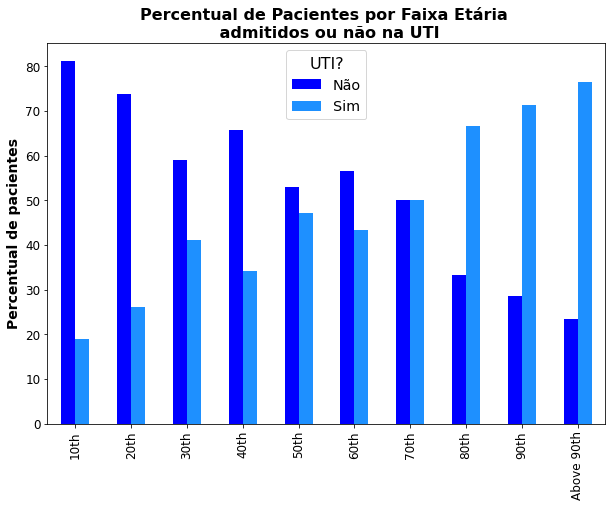

In [31]:
#Vizualizando os dados de percentual de pacientes por faixa etária
paciente_uti_crosstab.plot(x="AGE_PERCENTIL", y=["PERCENTUAL_PACIENTES_SEM_UTI", "PERCENTUAL_PACIENTES_UTI"], kind='bar', figsize = (10, 7), color=["blue", "dodgerblue"])

plt.title("Percentual de Pacientes por Faixa Etária \n admitidos ou não na UTI", fontsize = 16, fontweight = "bold")
plt.xlabel(" ")
plt.ylabel("Percentual de pacientes",fontsize = 14, fontweight = "bold")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

plt.legend(loc="best",  title="UTI?", labels=["Não", "Sim"], title_fontsize=16, fontsize="x-large")

plt.show()

Por meio do gráfico, pode-se observar claramente o aumento no percentual de pessoas que são admitidas à UTI com o aumento da idade, principalmente, a partir da faixa etária de 60 anos.

**Pacientes por gênero**

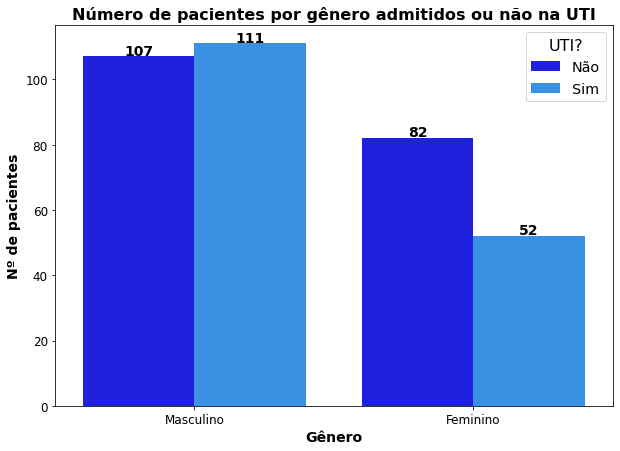

In [32]:
#visualizando a quantidade de pacientes por gênero que necessitaram ou não de UTI

plt.figure(figsize=(10, 7))

ax = sns.countplot(x="GENDER", data=dados_covid_preproc, hue="ICU", palette=["blue", "dodgerblue"])
plt.title("Número de pacientes por gênero admitidos ou não na UTI", fontsize = 16, fontweight = "bold")
plt.xlabel("Gênero", fontsize = 14, fontweight = "bold")
plt.ylabel("Nº de pacientes",fontsize = 14, fontweight = "bold")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Masculino'
labels[1] = 'Feminino'
ax.set_xticklabels(labels)

plt.legend(loc="best",  title="UTI?", labels=["Não", "Sim"], title_fontsize=16, fontsize="x-large")

#adicionando marcações nas barras
p = ax.patches
largura = p[0].get_width() / 2
ax.text(x=0 - largura, y=p[0].get_height()+.5, s=str(p[0].get_height()), ha='center', fontsize=14, fontweight="bold")
ax.text(x=1 - largura, y=p[1].get_height()+.5, s=str(p[1].get_height()), ha='center', fontsize=14, fontweight="bold")
ax.text(x=0 + largura, y=p[2].get_height()+.5, s=str(p[2].get_height()), ha='center', fontsize=14, fontweight="bold")
ax.text(x=1 + largura, y=p[3].get_height()+.5, s=str(p[3].get_height()), ha='center', fontsize=14, fontweight="bold")

plt.show()

O número de pacientes do gênero masculino é maior que do gênero feminino. No entanto, há uma nítida diferença com relação a admissão à UTI. O número de pacientes do gênero masculino admitidos e não admitidos à UTI é praticamente o mesmo. Já para as pacientes do gênero feminino, 37% menos foram admitidas à UTI.

**Pacientes acima de 65 anos**

In [33]:
#selecionando apenas os pacientes com idade acima de 65 anos
dados_paciente_65 = dados_covid_preproc.query("AGE_ABOVE65 == 1")
dados_paciente_65.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
5,6,1,70th,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.98,-1.00,-0.21,-0.45,-0.42,-0.59,0.18,0.89,-0.21,-0.45,-0.42,-0.59,0.18,0.89,-0.01,-0.17,-0.28,-0.50,0.49,0.96,-0.45,-0.61,-0.54,-0.64,-0.04,0.89,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
8,9,1,80th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.98,-1.00,0.09,-0.08,-0.32,-0.66,-0.32,0.84,0.09,-0.08,-0.32,-0.66,-0.32,0.84,0.24,0.12,-0.20,-0.57,0.19,0.94,-0.25,-0.35,-0.46,-0.70,-0.45,0.84,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
9,10,1,80th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.97,-1.00,0.26,-0.29,-0.75,-0.66,0.11,0.79,0.26,-0.29,-0.75,-0.66,0.11,0.79,0.38,-0.05,-0.59,-0.57,0.45,0.92,-0.13,-0.50,-0.81,-0.70,-0.10,0.79,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
10,11,1,80th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.98,-1.00,0.04,-0.25,-0.42,-0.39,0.79,0.68,0.04,-0.25,-0.42,-0.38,0.79,0.68,0.20,-0.01,-0.28,-0.29,0.87,0.88,-0.28,-0.47,-0.54,-0.45,0.45,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1


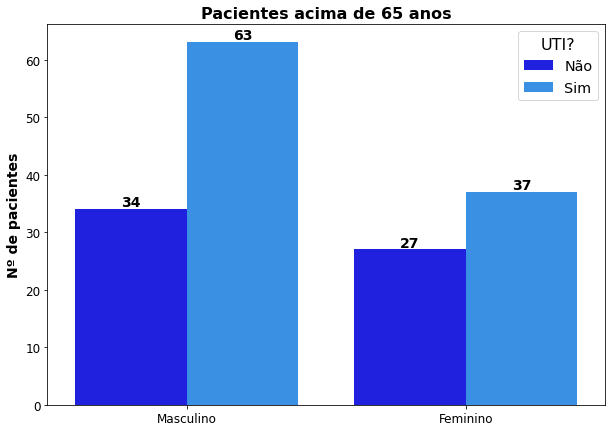

In [34]:
#visualizando os dados de pacientes acima de 65 anos admitidos ou não à UTI
plt.figure(figsize=(10, 7))

ax = sns.countplot(x="GENDER", data=dados_paciente_65, hue="ICU",  palette=["blue", "dodgerblue"])
plt.title("Pacientes acima de 65 anos", fontsize = 16, fontweight = "bold")
plt.xlabel("")
plt.ylabel("Nº de pacientes",fontsize = 14, fontweight = "bold")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Masculino'
labels[1] = 'Feminino'
ax.set_xticklabels(labels)

plt.legend(loc="best",  title="UTI?", labels=["Não", "Sim"], title_fontsize=16, fontsize="x-large")

p = ax.patches
largura = p[0].get_width() / 2
ax.text(x=0 - largura, y=p[0].get_height()+.5, s=str(p[0].get_height()), ha='center', fontsize=14, fontweight="bold")
ax.text(x=1 - largura, y=p[1].get_height()+.5, s=str(p[1].get_height()), ha='center', fontsize=14, fontweight="bold")
ax.text(x=0 + largura, y=p[2].get_height()+.5, s=str(p[2].get_height()), ha='center', fontsize=14, fontweight="bold")
ax.text(x=1 + largura, y=p[3].get_height()+.5, s=str(p[3].get_height()), ha='center', fontsize=14, fontweight="bold")

plt.show()

Observa-se que o número de pacientes acima de 65 anos e do gênero masculino que necessitaram de internação é maior que de pacientes do gênero femininos. Neste primeiro grupo, a quantidade de pacientes que foram para a UTI é 47% maior, ou seja, quase o dobro da quantidade daqueles que não necessitaram de UTI. No 
grupo feminino, esse diferença é bem menor, 27% a mais necessitaram de UTI. 

* **Resultados dos exames de sangue e sinais vitais**

A equipe do Hospital sírio-Libanês selecionaram algumas features importantes do ponto de vista biológico. Optei por selecioná-las para avalialiação.

Uma forma de avaliar comparativamente 2 grupos de amostras é por meio da aplicação do **Teste z**.

O **teste z** é um teste estatístico de hipótese usado para inferência, capaz de determinar se a diferença entre a média da amostra e da população é grande o suficiente para ser significativa estatisticamente. O teste permite a comparação de 2 grupos para identificar se as médias são iguais. O teste trabalha sobre 2 hipóteses:

* Hipótese nula(H0) - as médias são iguais 
* Hipótese alternativa(H1) - as médias são diferentes

Em testes de significância de hipótese nula, o p_value é a medida da probabilidade que uma diferença observada possa ter ocorrido. Ou seja, é a medida que permite negar ou não a hipótese nula. Os valores de ***p*** vão de 0 a 1.
Admitindo um nível de significancia de α = 0.05 assume-se como margem de segurança 5% de chances de erro, ou, 95% de chances de estar certo. A figura abaixo representa a curva de probabilidade de um teste de hipótese indicando a significância de 95%.

![](https://www.simplypsychology.org/p-value.png?ezimgfmt=rs:553x348/rscb24/ng:webp/ngcb24)

Fonte: https://www.simplypsychology.org/p-value.html

* `p < 0,05` indica diferença estatística

* `p > 0,05` indica que não há diferença 

Assim, por meio do teste foi possível comparar os dados de sinais vitais e exames de sangue entre homens e mulheres, admitidos ao não à UTI. As features foram plotadas utilizando boxplot e, posteriormentete, aplicado o teste z.

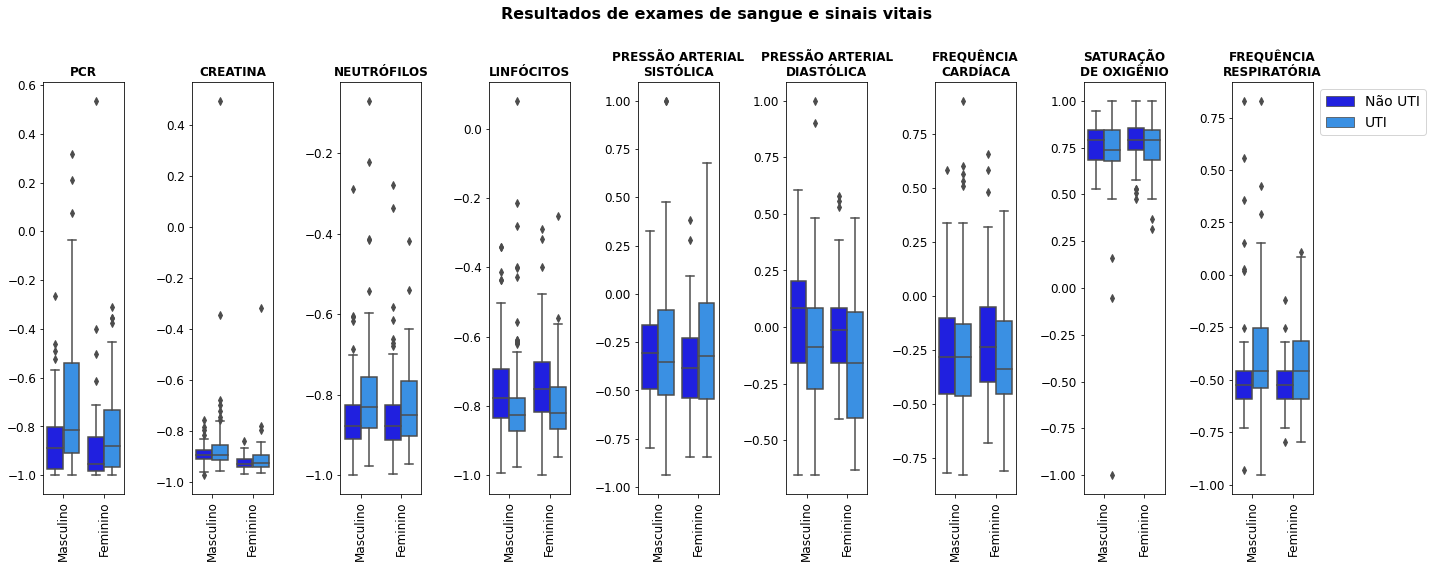

In [35]:
#plotando boxplot das features selecionadas, separando por gênero dos pacientes e admissão à UTI
plt.figure(figsize=(20,8))
plt.suptitle("Resultados de exames de sangue e sinais vitais", fontsize = 16, fontweight = "bold")

ax = plt.subplot(1,9,1)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["PCR_MEAN"], "PCR")
ax.get_legend().remove()
ax = plt.subplot(1,9,2)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["CREATININ_MEAN"], "CREATINA")
ax.get_legend().remove()
ax = plt.subplot(1,9,3)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["NEUTROPHILES_MEAN"], "NEUTRÓFILOS")
ax.get_legend().remove()
ax = plt.subplot(1,9,4)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["LINFOCITOS_MEAN"], "LINFÓCITOS")
ax.get_legend().remove()
ax = plt.subplot(1,9,5)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["BLOODPRESSURE_SISTOLIC_MEAN"], "PRESSÃO ARTERIAL\nSISTÓLICA")
ax.get_legend().remove()
ax = plt.subplot(1,9,6)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["BLOODPRESSURE_DIASTOLIC_MEAN"], "PRESSÃO ARTERIAL\nDIASTÓLICA")
ax.get_legend().remove()
ax = plt.subplot(1,9,7)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["HEART_RATE_MEAN"], "FREQUÊNCIA\nCARDÍACA")
ax.get_legend().remove()
ax = plt.subplot(1,9,8)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["OXYGEN_SATURATION_MEAN"], "SATURAÇÃO\nDE OXIGÊNIO")
ax.get_legend().remove()
ax = plt.subplot(1,9,9)
cria_boxplot(dados_covid_preproc, dados_covid_preproc["RESPIRATORY_RATE_MEAN"], "FREQUÊNCIA\nRESPIRATÓRIA")

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Não UTI", "UTI"], loc="best", fontsize=14, bbox_to_anchor=(1.0, 1.0))


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Os boxplots mostram a distribuição dos dados separados por gênero dos pacientes, e dentro destes, podemos ver os resultados obtidos para pacientes que necessitaram ou não de UTI. As observações feitas por meio dos gráficos são complementadas pelos resultados do teste Z.

**Resultados do teste de significância estatística (z-test)**


A diferença significativa foi definida por p-value < 0.05.
```
Features                          Masculino                 Feminino
PCR                              *2.5567e-07*               *0.0294*
CREATINA                         *0.0458*                    0.0506
NEUTRÓFILOS                      *0.0005*                    0.4482
LINFÓCITOS                        0.0501                    *0.0062*
PRESSÃO SANGUÍNEA DIASTÓLICA     *0.0047*                   *0.0020*
PRESSÃO ARTERIAL SISTÓLICA        0.6936                     0.0694
SATURÇÃO DE OXIGÊNIO              0.0611                     0.0591
FREQUÊNCIA CARDÍACA               0.9953                     0.1181
FREQUÊNCIA RESPIRATÓRIA          *0.0161*                   *0.0002*

                                    *diferença significativa
```
O código com o teste encontra-se na célula abaixo.

**Observações sobre os gráficos de boxplot**

* **PCR** - Através deste exame é possível obter a carga viral pela presença de material genético (RNA) do vírus. 

  A partir do gráfico é possível observar uma diferença considerável entre os valores obtidos para os pacientes de UTI e Não UTI, para ambos os gêneros, sendo esta observação comprovada pelo teste Z. Há uma diferença significativa maior entre os resultados obtidos para os pacientes do gênero masculino que precisaram e os que não precisaram de UTI.


* **Creatina** é uma substância naturalmente produzida no corpo, pelos rins e fígado, e tem como função fornecer energia para o músculo e favorecer o desenvolvimento das fibras musculares. 

  O gráfico mostra pequenas diferença entre os resultados obtidos. O teste z mostra que não há diferença signifcativas para pacientes do gênero feminino e uma diferença pequena para os do gênero masculino.

* **Neutrófilos**  são células sanguíneas leucocitárias que fazem parte essencial do sistema imune inato, presentes em alta concentração no sangue e estão envolvidos na defesa contra bactérias e fungos. **Linfócitos** são células de defesa produzidas na medula óssea e defendem o organismo contra doenças, infecções ou alergias. Número de linfócitos aumentado pode significar que o paciente está com alguma infecção bacteriana ou infecção viral.

  Assim, é esperado que pacientes que necessitam de UTI apresentem um maior número de linfócitos. A redução do número de neutrófilos (neutropenia) torna pacientes mais suscetíveis a infecções.

  O gráfico mostra que pacientes admitidos na UTI apresentam maior número de neutrófilos e menor número de linfócitos, quando comparado com os valores obtidos para paciente não admitidos à UTI. Para pacientes do gênero feminino, há diferença significativa apenas no número de linfócitos. Já para pacientes do gênero masculino, o inverso é observado.

* A Pressão arterial é medida pela pressão sanguíne diastólica e pressão sanguínea sistólica. A **pressão sistólica**, ou máxima, é aquela que marca a contração do músculo cardíaco, quando ele bombeia sangue para o corpo. A **pressão diastólica**, ou mínima, é a situação em que o sangue, após ter percorrido todo o corpo, passa pelas veias e retorna para o coração, relaxado.

  O gráfico mostra que há uma variação nas medidas de pressão arterial. No entanto, para a pressão sistólica, não houve variação significativa nas medidas entre pacientes que foram e não foram para UTI. Já a pressão arterial diastólica apresentou uma redução significativa em pacientes que foram para UTI.

* **Frequência cardíaca** é a velocidade das batidas do coração medida pelo número de contrações do coração por minuto.
O grafico, suportado pelo teste Z, mostra que não há diferença significativa nas medidas de nenhum grupo de pacientes.

* A **saturação de oxigênio** normal para adultos é 95% a 100%. Tem sido relatado que pacientes graves com COVID-19 chegaram a leituras inferiores a 50%.
Não há diferença 

  No casos dos dados aqui analisados, observamos por meio do gráfico que não há diferença significativa no nível de saturação de oxigênio dos paciente nas primeiras 2 horas de avaliação, mesmo para aqueles que necessitaram de UTI.

* **Frequência respiratória** é medida em respirações por minuto. 

  O gráfico mostra um aumento significativo na frequência respiratória de pacientes que necessitaram de UTI, de ambos os gêneros. Para pacientes do gênero feminino esse aumento é mais significativo. Esse aumento pode ser visto com um alerta de possível redução na saturação de oxigênio em um segundo momento.



In [36]:
#rodando o Teste Z para comparação das médias de cada feature entre homens e mulheres
resultado_teste_significancia_features(dados_covid_preproc)

Diferença significativa definidas por p-value <= 0.05. Resultados:
PCR
Masculino 2.5567979269536837e-07 
Feminino 0.029428794285772136
CREATINA
Masculino 0.04581781271036557 
Feminino 0.05063675061890755
NEUTRÓFILOS
Masculino 0.0005182975643328098 
Feminino 0.4482331804796126
LINFÓCITOS
Masculino 0.050197495252937895 
Feminino 0.00627361068357792
PRESSÃO ARTERIAL SISTÓLICA
Masculino 0.6935823843104727 
Feminino 0.06941913683737747
PRESSÃO ARTERIAL DIASTÓLICA
Masculino 0.004701640013896895 
Feminino 0.002062009538733446
SATURÇÃO DE OXIGÊNIO
Masculino 0.06114338007513959 
Feminino 0.05914501111810935
FREQUÊNCIA CARDÍACA
Masculino 0.9953379398186829 
Feminino 0.11809153626924028
FREQUÊNCIA RESPIRATÓRIA
Masculino 0.016138279950264615 
Feminino 0.0002816840452896218


#### Conclusões parciais 

* O número de pacientes por faixa etária é similar;
* O maior percentual de admissão à UTI são de pacientes nas faixas etárias acima de 60 anos, o qual aumenta com o aumento da faixa etária;
* Há uma número maior de pacientes do gênero masculino, dos quais mais da metade necessitou de UTI em algum momento. Das pacientes do gênero feminino, a quantidade que necessitou de UTI é 40% a menos que aquelas não admitidas à UTI;
* Dos pacientes acima de 65 anos, no geral, a maioria necessita de UTI, não havendo uma grande diferença com relação ao gênero em termos proporcionais.
* A pressão arterial e a frequência respiratória são os sinais vitais que apresentaram maiores alterações para ambos os gêneros de pacientes. E, claramente, a quantificação da taxa viral por PCR mostrou-se altamente importante.

> Conclui-se que a variável idade é importante na avaliação de necessidade de UTI e que os sinais vitais pressão arterial e a frequência respiratória podem ser bons alertas a maior necessidade de cuidados intensivos.

### Processamento dos dados - Parte 2



Os modelos de classificação não rodam com dados do tipo objeto. Sendo assim, os dados de faixa etária (coluna 'AGE_PERCENTIL') precisam ser transformados em variável categórica.

Essa conversão para dados categóricos, pode ser feita de duas formas: usando a função `get_dummies()` ou usando a função `.cat.codes`.

* Função **`get_dummies`**
  * Vantagem: A função get_dummies converte uma coluna especifica contendo dados do tipo *object* ou *category* em novas colunas contendo variáveis do tipo binárias.
  * Desvantagem: cria novas variáveis dentro do dataset, o que pode não ser a melhor estratégia para a escolha de um modelo de classificação.
  * Informação adicional: As novas colunas criadas pela função são alocadas no final do dataset.


In [37]:
#fazendo uma copia do dataset para evitar que qualquer alteração no dataset de teste seja refletida no dataset original
dados_teste_conv = dados_covid_preproc.copy(deep=True)
dados_teste_conv.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.98,-1.00,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.51,-0.82,-0.06,-0.52,0.36,0.95,-0.53,-0.51,-0.11,-0.71,0.60,0.96,-0.44,-0.49,0.00,-0.58,0.10,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
2,3,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-0.26,-0.26,-0.26,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.97,-0.97,...,-0.98,-1.00,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0.01,-0.37,-0.53,-0.45,-0.29,0.68,0.18,-0.11,-0.38,-0.36,0.21,0.88,-0.30,-0.56,-0.63,-0.52,-0.42,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-1.00,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,0.33,-0.15,0.16,-0.59,0.29,0.87,0.44,0.00,0.20,-0.57,0.54,0.94,-0.08,-0.35,-0.04,-0.58,0.07,0.89,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
4,5,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-1.00,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.04,-0.54,-0.54,-0.52,-0.20,0.82,0.03,-0.38,-0.40,-0.43,0.25,0.92,-0.25,-0.57,-0.63,-0.58,-0.33,0.84,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0


In [38]:
#aplicando a função get_dummies para conversão dos dados em binários
teste_dados_covid_dummy = pd.get_dummies(dados_teste_conv, columns=["AGE_PERCENTIL"])
teste_dados_covid_dummy.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,-0.94,...,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,-0.94,...,-0.06,-0.52,0.36,0.95,-0.53,-0.51,-0.11,-0.71,0.60,0.96,-0.44,-0.49,0.00,-0.58,0.10,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1,1,0,0,0,0,0,0,0,0,0
2,3,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-0.26,-0.26,-0.26,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.97,-0.97,-0.97,...,-0.53,-0.45,-0.29,0.68,0.18,-0.11,-0.38,-0.36,0.21,0.88,-0.30,-0.56,-0.63,-0.52,-0.42,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,-0.94,...,0.16,-0.59,0.29,0.87,0.44,0.00,0.20,-0.57,0.54,0.94,-0.08,-0.35,-0.04,-0.58,0.07,0.89,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,-0.94,...,-0.54,-0.52,-0.20,0.82,0.03,-0.38,-0.40,-0.43,0.25,0.92,-0.25,-0.57,-0.63,-0.58,-0.33,0.84,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0,1,0,0,0,0,0,0,0,0,0



* Função **`.cat.codes`**
  * Vantagem: É uma função do pandas que converte dados em dados do tipo categóricos com códigos numéricos.  `df['column'].astype("category").cat.codes`
  * Desvantagem:  Ao aplicar um modelo de machine learning, ele pode considerar pesos diferentes para cada categoria, de modo a ajustar de forma incorreta o algoritmo.

In [39]:
#convertendo os dados da coluna 'AGE_PERCENTIL' em dados categóricos
teste_dados_covid_cat = converte_age_percentil(dados_teste_conv)
teste_dados_covid_cat.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-0.98,-1.00,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.51,-0.82,-0.06,-0.52,0.36,0.95,-0.53,-0.51,-0.11,-0.71,0.60,0.96,-0.44,-0.49,0.00,-0.58,0.10,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
2,3,0,3,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-0.26,-0.26,-0.26,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.97,-0.97,...,-0.98,-1.00,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0.01,-0.37,-0.53,-0.45,-0.29,0.68,0.18,-0.11,-0.38,-0.36,0.21,0.88,-0.30,-0.56,-0.63,-0.52,-0.42,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-1.00,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,0.33,-0.15,0.16,-0.59,0.29,0.87,0.44,0.00,0.20,-0.57,0.54,0.94,-0.08,-0.35,-0.04,-0.58,0.07,0.89,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
4,5,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.32,-0.32,-0.32,-0.32,-1.00,-0.94,-0.94,...,-1.00,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.04,-0.54,-0.54,-0.52,-0.20,0.82,0.03,-0.38,-0.40,-0.43,0.25,0.92,-0.25,-0.57,-0.63,-0.58,-0.33,0.84,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0


> Avaliando as duas opções para transformação dos dados de faixa etária, optei por **usar a função `get_dummies`** a fim de evitar possíveis problemas de atribuição de pesos diferentes para as diferentes categorias.

A função utilizada, converte os dados em binários e aloca as novas colunas no início do dataset, mantendo todos os dados categóricos juntos.

In [40]:
#Aplicando a função contendo o get_dummies
dados_covid_binario = converte_variavel_categorica_binaria(dados_covid_preproc)
dados_covid_binario.head()

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,0,0,0,0,1,0,0,0,0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,...,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.09,-0.23,-0.28,-0.59,-0.29,0.74,0.24,0.00,-0.16,-0.50,0.21,0.90,-0.25,-0.46,-0.43,-0.64,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,1,0,0,0,0,0,0,0,0,0,2,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,...,-0.98,-1.00,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.51,-0.82,-0.06,-0.52,0.36,0.95,-0.53,-0.51,-0.11,-0.71,0.60,0.96,-0.44,-0.49,0.00,-0.58,0.10,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
2,0,0,0,1,0,0,0,0,0,0,3,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-0.26,-0.26,-0.26,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,...,-0.98,-1.00,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0.01,-0.37,-0.53,-0.45,-0.29,0.68,0.18,-0.11,-0.38,-0.36,0.21,0.88,-0.30,-0.56,-0.63,-0.52,-0.42,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,1,0,0,0,0,0,0,0,0,0,4,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,...,-1.00,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,0.33,-0.15,0.16,-0.59,0.29,0.87,0.44,0.00,0.20,-0.57,0.54,0.94,-0.08,-0.35,-0.04,-0.58,0.07,0.89,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
4,1,0,0,0,0,0,0,0,0,0,5,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,0.61,0.61,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-0.32,...,-1.00,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.04,-0.54,-0.54,-0.52,-0.20,0.82,0.03,-0.38,-0.40,-0.43,0.25,0.92,-0.25,-0.57,-0.63,-0.58,-0.33,0.84,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0


O dataset obtido possui uma coluna para cada faixa etária (novas colunas) e, ainda, a coluna 'AGE_PERCENTIL' (coluna original), a qual será removida do dataset para eliminar a duplicidade dos dados.

O dataset possui muitas variáveis e, dentre elas, variáveis muito semelhantes entre si, relativas a calcúlos feitos a partir dos dados originais dos resultados de exames e sinais vitais ('MIN', 'MAX', 'MEAN', 'MEDIAM', 'DIFF', 'REL'). Optei  por trabalhar apenas com os dados de média para evitar problemas de alta correlação entre variáveis que trazem informações semelhantes. A coluna 'WINDOW' também foi removida pois todos os dados são referentes a mesma janela (0-2 horas).

In [41]:
#removendo colunas de variáveis, deixando apenas os dados médios
referencia = ['MIN', 'MAX', 'MEDIAN','DIFF', 'REL', 'WINDOW', 'AGE_PERCENTIL']
dados_covid_drop_colunas = excluir_colunas(referencia, dados_covid_binario)
dados_covid_drop_colunas.head()

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,ICU
0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.18,-0.87,-0.74,-0.95,-0.89,0.09,0.11,-0.93,1.00,-0.84,-0.91,-0.87,-0.17,-0.70,-0.78,-0.75,-0.88,0.23,0.36,-0.54,-0.52,0.94,0.35,-0.03,-1.00,-0.99,-0.83,-0.84,-0.99,0.09,-0.23,-0.28,-0.59,-0.29,0.74,1
1,1,0,0,0,0,0,0,0,0,0,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.74,-0.96,-0.78,0.14,0.16,-0.96,1.00,-0.38,-0.91,-0.41,-0.17,-0.70,-0.78,-0.75,-0.94,0.23,0.36,-0.40,-0.70,0.94,0.35,0.09,-1.00,-0.99,-0.85,-0.84,-0.98,-0.49,-0.69,-0.05,-0.65,0.36,0.94,1
2,0,0,0,1,0,0,0,0,0,0,3,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-1.00,-1.00,-0.32,-0.32,-0.97,-1.00,0.33,-0.97,-0.19,-0.32,-0.89,-0.20,-0.22,-0.96,-0.83,-0.73,-0.84,-0.78,-0.17,-0.63,-0.78,-0.78,-0.50,0.23,0.36,-0.56,-0.78,0.94,0.58,0.20,-0.99,-0.96,-0.85,-0.94,-0.98,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0
3,1,0,0,0,0,0,0,0,0,0,4,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.83,-0.94,-0.85,0.36,0.30,-0.96,1.00,-0.70,-0.64,-0.81,-0.17,-0.70,-0.78,-0.75,-0.99,0.23,0.36,-0.46,-0.59,0.94,0.35,0.14,-1.00,-0.99,-0.85,-0.90,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,0
4,1,0,0,0,0,0,0,0,0,0,5,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.89,-0.74,-0.96,-0.89,0.29,0.24,-0.96,1.00,-0.71,-0.34,-0.85,-0.17,-0.70,-0.78,-0.75,-1.00,0.23,0.36,-0.29,-0.67,0.94,0.35,0.09,-1.00,-0.99,-0.85,-0.88,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,0


In [42]:
#Visualizando o formato do dataset após exclusão das colunas
linha, coluna = dados_covid_drop_colunas.shape
print(f'Pacientes: {linha}')
print(f'Features: {coluna}')

Pacientes: 352
Features: 65


In [43]:
#vizualizando os tipos de dados presentes no dataset
dados_covid_drop_colunas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 352
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE_PERCENTIL_10th            352 non-null    uint8  
 1   AGE_PERCENTIL_20th            352 non-null    uint8  
 2   AGE_PERCENTIL_30th            352 non-null    uint8  
 3   AGE_PERCENTIL_40th            352 non-null    uint8  
 4   AGE_PERCENTIL_50th            352 non-null    uint8  
 5   AGE_PERCENTIL_60th            352 non-null    uint8  
 6   AGE_PERCENTIL_70th            352 non-null    uint8  
 7   AGE_PERCENTIL_80th            352 non-null    uint8  
 8   AGE_PERCENTIL_90th            352 non-null    uint8  
 9   AGE_PERCENTIL_Above 90th      352 non-null    uint8  
 10  PATIENT_VISIT_IDENTIFIER      352 non-null    int64  
 11  AGE_ABOVE65                   352 non-null    int64  
 12  GENDER                        352 non-null    int64  
 13  DISEA

*Features* com alta correlação podem gerar problemas de overfit nos modelos de 
predição.

O **overfit** é uma correspondência muito próxima ou exata do modelo ao conjunto de dados de treino, que pode levá-lo a não conseguir ajustar-se aos dados de teste ou prever observações futuras de forma confiável. 

A figura abaixo representa graficamente esse superajuste do modelo.

![](https://drek4537l1klr.cloudfront.net/rhys/v-4/Figures/CH09_FIG_2_MLR.png)

Fonte: https://livebook.manning.com/book/machine-learning-for-mortals-mere-and-otherwise/chapter-9/v-4/

Uma forma de evitar o overfitting é não utilizar features altamente correlacionadas para treinar o modelo. 




Para avaliar se há features com alta correlação, usei a matrix de correlação e o heatmap.

In [44]:
#vizualizando apenas os dados categóricos
dados_covid_drop_colunas.select_dtypes(exclude='float64')

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,ICU
0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,2,0,0,1
2,0,0,0,1,0,0,0,0,0,0,3,0,1,0
3,1,0,0,0,0,0,0,0,0,0,4,0,0,0
4,1,0,0,0,0,0,0,0,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0,0,0,1,0,0,0,0,0,0,380,0,1,1
349,0,0,0,0,0,0,0,0,0,1,381,1,0,0
350,0,0,0,0,1,0,0,0,0,0,382,0,0,1
351,0,0,0,1,0,0,0,0,0,0,383,0,1,0


In [45]:
#criando a matrix de correlação dos dados 
matrix_corr = dados_covid_drop_colunas.iloc[:, 13:-1].corr().abs()
matrix_corr

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN
DISEASE GROUPING 1,1.00,0.20,0.28,0.02,0.34,0.20,0.49,0.18,0.15,0.01,0.03,0.10,0.01,0.07,0.05,0.02,0.10,0.00,0.04,0.05,0.07,0.08,0.10,0.02,0.04,0.02,0.00,0.02,0.01,0.06,0.01,0.08,0.07,0.01,0.05,0.02,0.12,0.03,0.03,0.08,0.04,0.08,0.06,0.09,0.01,0.11,0.11,0.02,0.09,0.04,0.03
DISEASE GROUPING 2,0.20,1.00,0.08,0.11,0.11,0.03,0.12,0.14,0.07,0.03,0.01,0.03,0.01,0.04,0.00,0.01,0.02,0.17,0.03,0.02,0.01,0.15,0.16,0.09,0.00,0.02,0.02,0.02,0.01,0.05,0.01,0.03,0.03,0.01,0.00,0.07,0.07,0.01,0.01,0.09,0.00,0.02,0.00,0.16,0.05,0.10,0.03,0.02,0.02,0.01,0.03
DISEASE GROUPING 3,0.28,0.08,1.00,0.31,0.29,0.28,0.47,0.08,0.14,0.04,0.03,0.08,0.12,0.06,0.01,0.17,0.03,0.01,0.04,0.02,0.34,0.05,0.06,0.01,0.00,0.02,0.06,0.04,0.04,0.01,0.16,0.02,0.00,0.04,0.09,0.02,0.16,0.03,0.00,0.09,0.02,0.03,0.01,0.09,0.01,0.05,0.14,0.05,0.05,0.10,0.15
DISEASE GROUPING 4,0.02,0.11,0.31,1.00,0.13,0.17,0.14,0.10,0.06,0.05,0.01,0.05,0.01,0.07,0.03,0.01,0.04,0.07,0.05,0.01,0.16,0.00,0.02,0.13,0.01,0.03,0.09,0.00,0.01,0.01,0.01,0.03,0.02,0.01,0.03,0.02,0.01,0.01,0.03,0.02,0.01,0.00,0.06,0.20,0.03,0.02,0.03,0.03,0.00,0.05,0.02
DISEASE GROUPING 5,0.34,0.11,0.29,0.13,1.00,0.13,0.46,0.11,0.15,0.08,0.03,0.17,0.01,0.11,0.06,0.02,0.03,0.02,0.04,0.04,0.07,0.08,0.11,0.32,0.02,0.01,0.09,0.03,0.02,0.04,0.02,0.10,0.03,0.01,0.05,0.05,0.17,0.03,0.13,0.05,0.03,0.05,0.08,0.15,0.11,0.03,0.17,0.05,0.12,0.04,0.04
DISEASE GROUPING 6,0.20,0.03,0.28,0.17,0.13,1.00,0.22,0.02,0.09,0.00,0.02,0.06,0.01,0.04,0.02,0.01,0.02,0.01,0.03,0.04,0.03,0.10,0.09,0.06,0.05,0.02,0.10,0.04,0.01,0.05,0.01,0.04,0.04,0.01,0.10,0.05,0.04,0.02,0.04,0.05,0.03,0.03,0.05,0.04,0.02,0.00,0.04,0.01,0.01,0.05,0.01
HTN,0.49,0.12,0.47,0.14,0.46,0.22,1.00,0.21,0.22,0.00,0.07,0.09,0.04,0.05,0.03,0.10,0.06,0.05,0.07,0.07,0.13,0.06,0.08,0.17,0.04,0.03,0.01,0.03,0.06,0.02,0.08,0.07,0.03,0.00,0.06,0.02,0.20,0.00,0.03,0.05,0.05,0.06,0.04,0.19,0.07,0.03,0.20,0.08,0.12,0.13,0.04
IMMUNOCOMPROMISED,0.18,0.14,0.08,0.10,0.11,0.02,0.21,1.00,0.20,0.23,0.08,0.05,0.06,0.01,0.11,0.12,0.07,0.02,0.19,0.12,0.06,0.30,0.29,0.10,0.05,0.09,0.08,0.08,0.10,0.06,0.05,0.04,0.03,0.04,0.05,0.07,0.06,0.04,0.04,0.09,0.14,0.12,0.06,0.11,0.01,0.10,0.05,0.01,0.06,0.01,0.02
OTHER,0.15,0.07,0.14,0.06,0.15,0.09,0.22,0.20,1.00,0.10,0.03,0.11,0.01,0.05,0.00,0.01,0.03,0.12,0.07,0.06,0.12,0.08,0.07,0.06,0.11,0.09,0.01,0.10,0.01,0.02,0.02,0.02,0.07,0.03,0.07,0.01,0.03,0.03,0.09,0.02,0.03,0.02,0.06,0.05,0.02,0.03,0.05,0.10,0.02,0.06,0.05
ALBUMIN_MEAN,0.01,0.03,0.04,0.05,0.08,0.00,0.00,0.23,0.10,1.00,0.29,0.08,0.12,0.00,0.32,0.06,0.07,0.05,0.36,0.30,0.21,0.15,0.14,0.14,0.11,0.05,0.13,0.02,0.12,0.03,0.06,0.11,0.11,0.08,0.12,0.04,0.09,0.06,0.06,0.02,0.26,0.22,0.07,0.01,0.01,0.01,0.03,0.02,0.01,0.02,0.04


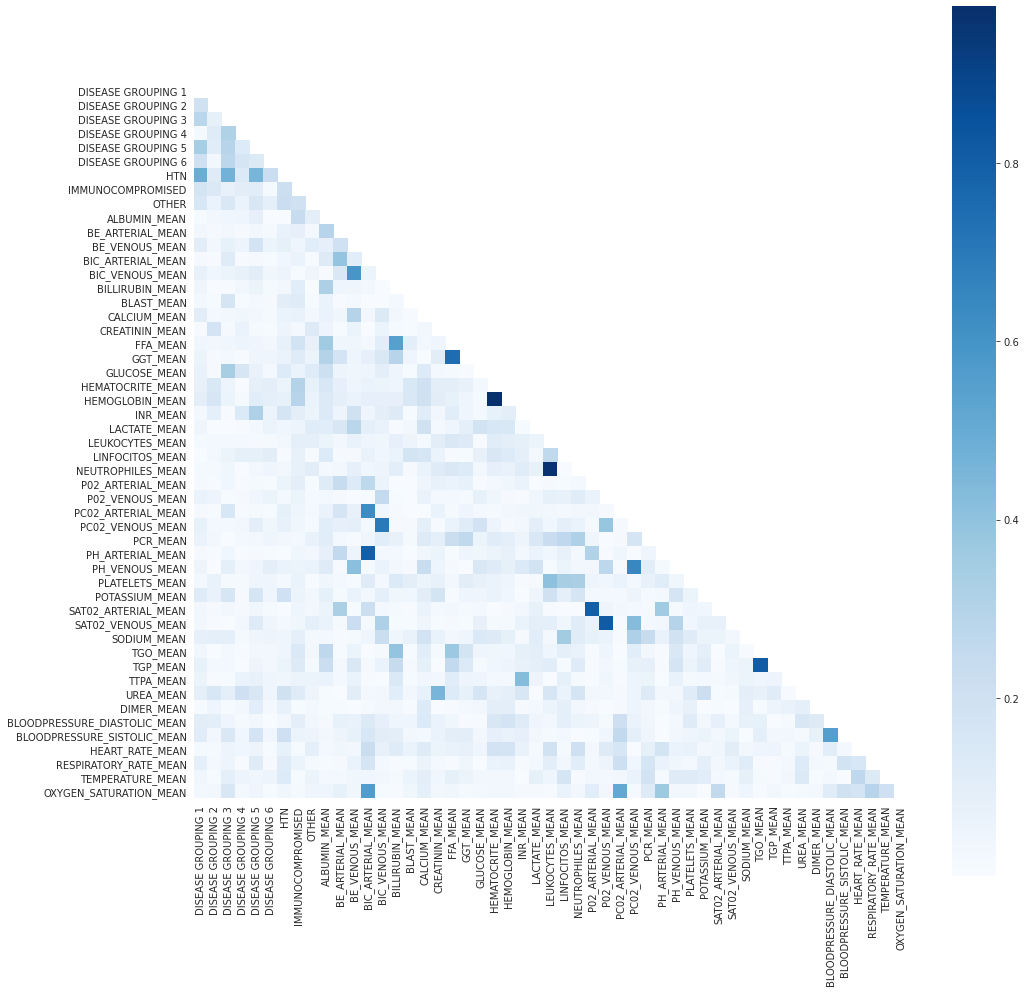

In [46]:
#Vizualizando a correlação entre as features através do heatmap
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(matrix_corr, mask=mask, square=True, cmap=plt.cm.Blues)

O heatmap mostra uma grande área clara que indica baixa correlação entre as features. Há apenas alguns pontos mais escuros indicando que há algumas correlações com valores acima de 0.8, os quais estou considerando como uma alta correlação.

As features altamente correlacionadas foram removidas do dataset.

In [47]:
#removendo as features com alta correlação
dados_covid_preproc_exclui_alta_corr = remove_corr_var(dados_covid_drop_colunas, 0.8)
dados_covid_preproc_exclui_alta_corr

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SODIUM_MEAN,TGO_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,ICU
0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.18,-0.87,-0.74,-0.95,-0.89,0.09,-0.93,1.00,-0.84,-0.91,-0.17,-0.70,-0.78,-0.75,-0.88,0.23,0.36,-0.54,-0.52,0.94,-0.03,-1.00,-0.83,-0.84,-0.99,0.09,-0.23,-0.28,-0.59,-0.29,0.74,1
1,1,0,0,0,0,0,0,0,0,0,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.74,-0.96,-0.78,0.14,-0.96,1.00,-0.38,-0.91,-0.17,-0.70,-0.78,-0.75,-0.94,0.23,0.36,-0.40,-0.70,0.94,0.09,-1.00,-0.85,-0.84,-0.98,-0.49,-0.69,-0.05,-0.65,0.36,0.94,1
2,0,0,0,1,0,0,0,0,0,0,3,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-1.00,-1.00,-0.32,-0.32,-0.97,-1.00,0.33,-0.97,-0.19,-0.32,-0.89,-0.20,-0.96,-0.83,-0.73,-0.84,-0.17,-0.63,-0.78,-0.78,-0.50,0.23,0.36,-0.56,-0.78,0.94,0.20,-0.99,-0.85,-0.94,-0.98,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0
3,1,0,0,0,0,0,0,0,0,0,4,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.83,-0.94,-0.85,0.36,-0.96,1.00,-0.70,-0.64,-0.17,-0.70,-0.78,-0.75,-0.99,0.23,0.36,-0.46,-0.59,0.94,0.14,-1.00,-0.85,-0.90,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,0
4,1,0,0,0,0,0,0,0,0,0,5,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.89,-0.74,-0.96,-0.89,0.29,-0.96,1.00,-0.71,-0.34,-0.17,-0.70,-0.78,-0.75,-1.00,0.23,0.36,-0.29,-0.67,0.94,0.09,-1.00,-0.85,-0.88,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0,0,0,1,0,0,0,0,0,0,380,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.58,-1.00,-1.00,-0.32,-0.32,-0.29,-1.00,0.33,-0.94,1.00,-0.15,-0.82,-0.25,-0.81,1.00,-0.70,-0.88,-0.17,-0.70,-0.78,-0.75,-0.57,0.23,0.36,-0.90,-0.63,0.94,-0.43,-0.93,-0.63,-0.86,-0.98,-0.16,-0.69,0.34,-0.46,0.14,0.74,1
349,0,0,0,0,0,0,0,0,0,1,381,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.29,-0.89,-0.74,-0.96,-0.89,-0.24,-0.96,1.00,-0.79,-0.92,-0.17,-0.70,-0.78,-0.75,-0.99,0.23,0.36,-0.52,-0.52,0.94,-0.31,-1.00,-0.85,-0.86,-0.98,-0.41,-0.69,-0.28,-0.46,-0.06,0.53,0
350,0,0,0,0,1,0,0,0,0,0,382,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.74,-0.96,-0.89,0.06,-0.96,1.00,-0.72,-0.84,-0.17,-0.70,-0.78,-0.75,-0.03,0.23,0.36,-0.66,-0.41,0.94,-0.09,-1.00,-0.85,-0.79,-0.96,0.01,-0.38,-0.32,-0.46,-0.07,0.89,1
351,0,0,0,1,0,0,0,0,0,0,383,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.92,-0.74,-0.96,-0.84,-0.07,-0.96,1.00,-0.88,-0.82,-0.17,-0.70,-0.78,-0.75,-0.80,0.23,0.36,-0.62,-0.56,0.94,0.09,-1.00,-0.85,-0.94,-0.98,0.09,-0.23,-0.30,-0.66,-0.11,0.74,0


In [48]:
#apenas 4 variáveis foram excluidas --> ['HEMOGLOBIN_MEAN', 'NEUTROPHILES_MEAN', 'SAT02_VENOUS_MEAN', 'TGP_MEAN']
dados_covid_preproc_exclui_alta_corr.shape

(352, 61)

Finalizado o processamento dos dados, fiz uma cópia dos dados tratados obtendo um **novo dataset (dados_covid - dados originais processados)**, o qual foi utlizado para **avaliação dos modelos de Machine Learning**.

In [49]:
#criando o dataset que será utilizado para avaliação dos modelos de Machine Learning
dados_covid = dados_covid_preproc_exclui_alta_corr.copy(deep=True)
dados_covid.head()

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SODIUM_MEAN,TGO_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,ICU
0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.18,-0.87,-0.74,-0.95,-0.89,0.09,-0.93,1.00,-0.84,-0.91,-0.17,-0.70,-0.78,-0.75,-0.88,0.23,0.36,-0.54,-0.52,0.94,-0.03,-1.00,-0.83,-0.84,-0.99,0.09,-0.23,-0.28,-0.59,-0.29,0.74,1
1,1,0,0,0,0,0,0,0,0,0,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.74,-0.96,-0.78,0.14,-0.96,1.00,-0.38,-0.91,-0.17,-0.70,-0.78,-0.75,-0.94,0.23,0.36,-0.40,-0.70,0.94,0.09,-1.00,-0.85,-0.84,-0.98,-0.49,-0.69,-0.05,-0.65,0.36,0.94,1
2,0,0,0,1,0,0,0,0,0,0,3,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-1.00,-1.00,-0.32,-0.32,-0.97,-1.00,0.33,-0.97,-0.19,-0.32,-0.89,-0.20,-0.96,-0.83,-0.73,-0.84,-0.17,-0.63,-0.78,-0.78,-0.50,0.23,0.36,-0.56,-0.78,0.94,0.20,-0.99,-0.85,-0.94,-0.98,0.01,-0.37,-0.53,-0.46,-0.29,0.68,0
3,1,0,0,0,0,0,0,0,0,0,4,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.83,-0.94,-0.85,0.36,-0.96,1.00,-0.70,-0.64,-0.17,-0.70,-0.78,-0.75,-0.99,0.23,0.36,-0.46,-0.59,0.94,0.14,-1.00,-0.85,-0.90,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,0
4,1,0,0,0,0,0,0,0,0,0,5,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.89,-0.74,-0.96,-0.89,0.29,-0.96,1.00,-0.71,-0.34,-0.17,-0.70,-0.78,-0.75,-1.00,0.23,0.36,-0.29,-0.67,0.94,0.09,-1.00,-0.85,-0.88,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,0


In [50]:
#avaliando os dados após limpeza
dados_covid.describe()

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SODIUM_MEAN,TGO_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,ICU
count,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00
mean,0.11,0.12,0.11,0.11,0.10,0.09,0.10,0.10,0.08,0.10,192.82,0.46,0.38,0.11,0.02,0.09,0.02,0.13,0.04,0.19,0.16,0.83,0.58,-1.00,-0.96,-0.32,-0.32,-0.95,-0.99,0.33,-0.89,-0.73,-0.94,-0.85,-0.11,-0.94,0.54,-0.77,-0.76,-0.17,-0.70,-0.78,-0.77,-0.81,0.23,0.38,-0.54,-0.57,0.93,-0.11,-0.99,-0.84,-0.85,-0.96,-0.04,-0.31,-0.24,-0.47,0.11,0.75,0.46
std,0.31,0.32,0.31,0.31,0.30,0.28,0.30,0.30,0.27,0.30,110.76,0.50,0.49,0.31,0.15,0.29,0.14,0.33,0.20,0.40,0.37,0.37,0.13,0.02,0.11,0.03,0.09,0.04,0.11,0.08,0.10,0.17,0.13,0.12,0.22,0.05,0.80,0.12,0.14,0.09,0.13,0.01,0.05,0.23,0.04,0.10,0.18,0.17,0.14,0.21,0.02,0.05,0.08,0.14,0.27,0.29,0.28,0.22,0.27,0.16,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.58,-1.00,-1.00,-0.76,-1.00,-0.99,-1.00,-0.04,-0.97,-0.93,-1.00,-1.00,-1.00,-1.00,-0.98,-1.00,-1.00,-1.00,-1.00,-0.96,-1.00,-1.00,-0.49,-0.09,-1.00,-1.00,-1.00,-0.83,-1.00,-0.96,-0.97,-1.00,-0.65,-0.94,-0.83,-0.95,-0.57,-1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.96,-1.00,0.35,-0.93,-0.74,-0.96,-0.89,-0.23,-0.96,1.00,-0.85,-0.85,-0.17,-0.70,-0.78,-0.75,-0.98,0.23,0.36,-0.65,-0.67,0.94,-0.20,-1.00,-0.85,-0.90,-0.98,-0.19,-0.54,-0.43,-0.59,-0.11,0.68,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,191.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.74,-0.96,-0.89,-0.09,-0.96,1.00,-0.80,-0.80,-0.17,-0.70,-0.78,-0.75,-0.88,0.23,0.36,-0.56,-0.56,0.94,-0.09,-1.00,-0.85,-0.87,-0.98,-0.04,-0.37,-0.28,-0.53,0.07,0.79,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,289.25,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.88,-0.74,-0.96,-0.85,0.04,-0.93,1.00,-0.73,-0.70,-0.17,-0.70,-0.78,-0.75,-0.74,0.23,0.36,-0.44,-0.48,0.94,0.03,-0.99,-0.85,-0.83,-0.97,0.09,-0.15,-0.09,-0.39,0.25,0.84,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,384.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-0.61,-0.14,-0.12,0.12,-0.29,1.00,0.69,0.49,1.00,1.00,0.45,0.81,-0.36,1.00,-0.02,0.08,0.73,0.37,-0.74,-0.55,0.54,0.40,1.00,0.26,0.22,1.00,1.00,-0.69,-0.44,-0.41,1.00,1.00,1.00,0.91,0.83,0.96,1.00,1.00


In [51]:
#avaliando se ainda há dados vazios
(dados_covid.isna().sum()).value_counts()

0    61
dtype: int64

## **Dados Sírio-Libanês**


O time de *Data science* do Hospital Sírio libânes criou uma função para criar novas features e selecionar aquelas consideradas de maior interesse do ponto de vista biológico. A função foi aplicada sobre o dataset original pré- processado (dados_covid_preproc) e um novo dataset foi obtido.

Optei por trabalhar com os dois datasets separadamente, para avaliar a performace dos modelos e, posteriormente, comparar a resposta obtida a partir de ambos.

In [52]:
#Aplicando a função criada pelo Sírio-Libanês nos dados processados
dados_covid_sirio = makebio_df(dados_covid_preproc)
dados_covid_sirio.head()

,ICU,WINDOW,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,BLOODPRESSURE_ARTERIAL_MEAN,RESPIRATORY_RATE_MAX,HTN,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,GASO,OXYGEN_SATURATION_MIN,HEART_RATE_MAX,PCR_MEAN,CREATININ_MEAN
0,1,0-2,0,1,0,-0.02,-0.64,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1,0.90,-0.43,-0.88,-0.87
1,1,0-2,2,0,0,-0.55,-0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.96,0.00,-0.94,-0.91
2,0,0-2,3,0,1,-0.11,-0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.88,-0.63,-0.50,-0.97
3,0,0-2,4,0,0,0.17,-0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.94,-0.04,-0.99,-0.91
4,0,0-2,5,0,0,-0.20,-0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.92,-0.63,-1.00,-0.89


In [53]:
#verificando os dados contidos na coluna 'WINDOW' --> APENAS DADOS DA JANELA 0-2
dados_covid_sirio["WINDOW"].value_counts()

0-2    352
Name: WINDOW, dtype: int64

In [54]:
#excluindo a coluna 'WINDOW' pois todos os dados pertencem a mesma janela, 0-2.
dados_covid_sirio = dados_covid_sirio.drop(['WINDOW'], axis=1)
dados_covid_sirio.head()

,ICU,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,BLOODPRESSURE_ARTERIAL_MEAN,RESPIRATORY_RATE_MAX,HTN,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,GASO,OXYGEN_SATURATION_MIN,HEART_RATE_MAX,PCR_MEAN,CREATININ_MEAN
0,1,0,1,0,-0.02,-0.64,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1,0.90,-0.43,-0.88,-0.87
1,1,2,0,0,-0.55,-0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.96,0.00,-0.94,-0.91
2,0,3,0,1,-0.11,-0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.88,-0.63,-0.50,-0.97
3,0,4,0,0,0.17,-0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.94,-0.04,-0.99,-0.91
4,0,5,0,0,-0.20,-0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.92,-0.63,-1.00,-0.89


In [55]:
linha, coluna = dados_covid_sirio.shape
print(f"O dataset obtido possui informações referentes a {linha} pacientes e {coluna} variáveis.")

O dataset obtido possui informações referentes a 352 pacientes e 18 variáveis.


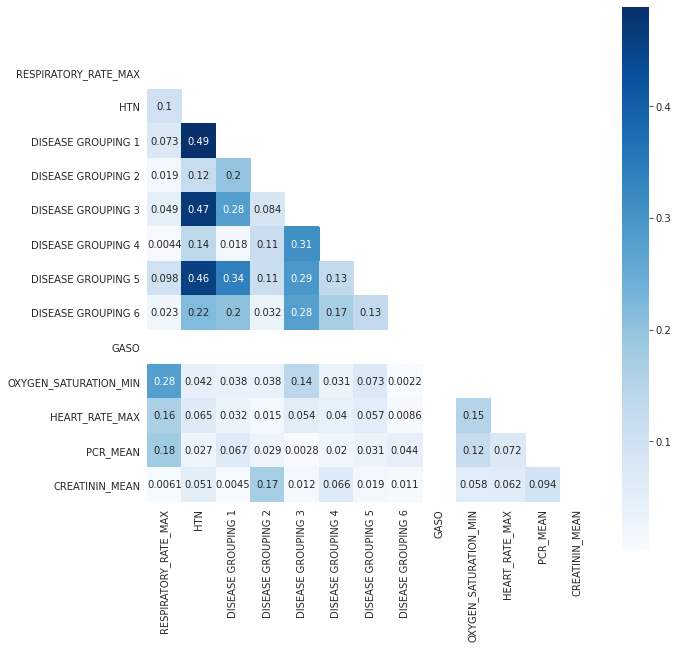

In [56]:
#Avaliando a correlação entre as variáveis através do mapa de calor
matrix_corr_sirio = dados_covid_sirio.iloc[:, 5:].corr().abs()

mask = np.zeros_like(matrix_corr_sirio)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(matrix_corr_sirio, mask=mask, square=True, cmap=plt.cm.Blues, annot=True)

> O mapa de calor mostra que há baixa correlação entre as features presentes no dataset, considerando uma alta correlação como sendo o valor de 0.8. O maior valor de correlação obtido foi de 0.49, o que indica que não há necessidade de excluir nenhuma feature.  


## **Machine Learning**


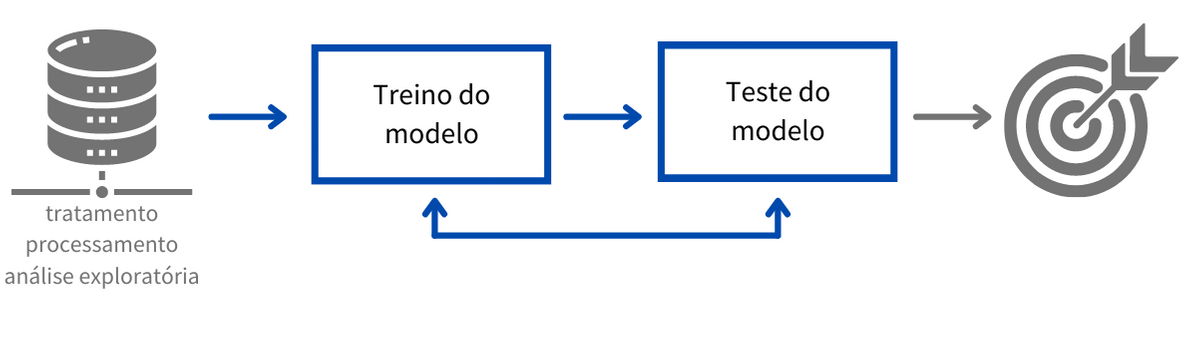

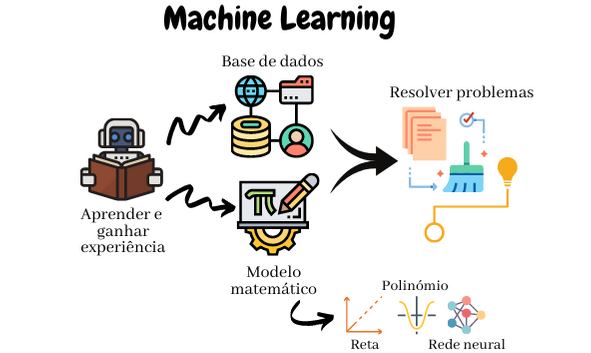

Há diversos algoritmos que podem dizer algo interessante sobre o conjunto de dados, construindo uma lógica através dos dados.

Métricas de avaliação são utilizadas por fonecerem uma medidad quantitativa que caracteriza a concordância entre previsões e observações. Neste projeto, foram utilizadas duas métricas, *Classification Report* e *Confusion Matrix* (Matrix de confusão).


**Métricas de Avaliação**


Há 4 caminhos para avaliar se a predição está correta ou errada:
1. Verdadeiro negativo (VN)
2. Verdadeiro positivo (VP)
3. Falso negativo (FN)
4. Falso positivo (FP)

* **Classification Report**

A função `classification_report` cria um relatório de texto mostrando as principais métricas de classificação: Precision, recall and F-measures.

**Precision:** O *predicion* é a precisão do modelo em fazer previsões positivas, sendo a razão entre verdadeiros positivo pela soma dos verdadeiros positivos e falsos positivos.

`Precision = VP / (VP + FP)`

**Recall:** O *recall* é a fração de positivos que foram corretamente identificados, sendo definido como a razão de verdadeiros positivos pela soma dos verdadeiros positivos e os falsos negativos.

`recall = VP / (VP + FN)`

**F1-score:** A *F1-score* pode ser interpretada como uma média harmônica ponderada da precisão (*precision*) e da recuperação (*recall*), onde um F1-score atinge seu melhor valor em 1 e o pior em 0. A contribuição relativa de *precision* e *recall* para F1-score são iguais. A fórmula para obtenção é:

`F1 = 2 * (precision * recall) / (precision + recall)`

**AUC** - É a área sob a curva ROC (Receiver Operating Characteristic) a qual avalia a qualidade da resposta do modelo. A figura abaixo representa uma curva ROC e indica o valor da área sob a curva, que é o valor de AUC.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png)

Fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

* **Confusion Matrix**

Também conhecida como matriz de correspondência apresenta um layout de tabela específico que permite a visualização do desempenho de um algoritmo. Cada linha da matriz representa as instâncias em uma classe prevista, enquanto cada coluna representa as instâncias em uma classe real (ou vice-versa). A matriz torna mais fácil visualizar se o modelo está confundindo as classes.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png)

Fonte:https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Os dados foram treinados e testados aplicando **validação cruzada**. O objetivo da validação cruzada é testar a capacidade do modelo de prever novos dados que não foram usados ​​na estimativa, a fim de sinalizar problemas como *overfitting* ou viés de seleção, e dar uma visão de como o modelo irá performar para um conjunto de dados desconhecido.

Na validação cruzada os dados são dividios em subconjuntos complementares (k-folds), realizando a análise em um subconjunto (conjunto de treino) e validando a análise no outro subconjunto (conjunto de teste). Para reduzir a variabilidade, a validação cruzada é realizada n vezes, método chamado ***k-fold cross validation***, usando diferentes partições e os resultados da validação são combinados ao longo das rodadas para dar uma estimativa do desempenho preditivo do modelo, como mostrado na figura abaixo.

![](https://www.researchgate.net/profile/Mariia-Fedotenkova/publication/311668395/figure/fig5/AS:613923871019041@1523382265447/A-schematic-illustration-of-K-fold-cross-validation-for-K-5-Original-dataset-shown_W640.jpg)

fonte:https://www.researchgate.net/publication/311668395_Extraction_of_multivariate_components_in_brain_signals_obtained_during_general_anesthesia

Portanto, a validação cruzada combina as medidas de aptidão na predição para derivar uma estimativa mais precisa do desempenho de predição do modelo.



Cinco modelos de classificação foram escolhidos para serem testados com os dados de pacientes com covid a fim de identificar o melhor modelo para prever de forma mais precisa se o paciente precisará de UTI, possibilitando assim melhor preparo do hospital.

### Dataset original processado

#### Dummy

Modelo usado como linha de base para comparação com modelos de classificação reais.

* Testando o parâmetro `strategy = "most_frequent"` e `strategy="constant"` não houve variação no resultado, no entanto, o "constant" criou um viés, levando o modelo a prever todos os dados com sendo a variável de interesse.

In [57]:
modelo_dummy = DummyClassifier(strategy="most_frequent")
roda_modelos_cv(modelo_dummy, dados_covid, 5, 10)

AUC 0.5 - 0.5


(0.5, 0.5)

              precision    recall  f1-score   support

     Não UTI       0.53      1.00      0.70        47
         UTI       0.00      0.00      0.00        41

    accuracy                           0.53        88
   macro avg       0.27      0.50      0.35        88
weighted avg       0.29      0.53      0.37        88



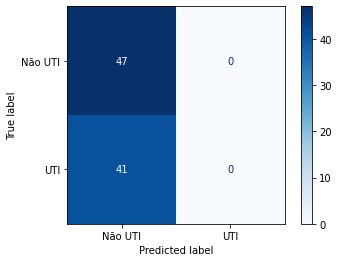

In [58]:
visualiza_metricas(dados_covid, modelo_dummy)

In [59]:
modelo_dummy_c = DummyClassifier(strategy="constant", constant=1)
roda_modelos_cv(modelo_dummy, dados_covid, 5, 10)

AUC 0.5 - 0.5


(0.5, 0.5)

              precision    recall  f1-score   support

     Não UTI       0.00      0.00      0.00        47
         UTI       0.47      1.00      0.64        41

    accuracy                           0.47        88
   macro avg       0.23      0.50      0.32        88
weighted avg       0.22      0.47      0.30        88



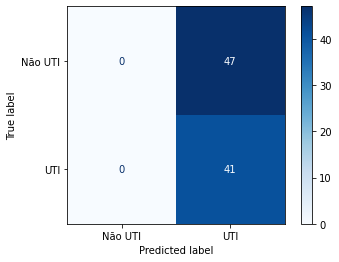

In [60]:
visualiza_metricas(dados_covid, modelo_dummy_c)

> O modelo dummy, linha de base de comparação com outros modelos, apresentou uma acurácia de 0.53.

#### Logistic regression

Modelo estatístico que usa uma função logistica para modelar uma variável dependente binária.

* **Testando o modelo passando apenas o parâmetro `max_iter`**

In [61]:
modelo_lr = LogisticRegression(max_iter=10000)
roda_modelos_cv(modelo_lr, dados_covid, 5, 10)

AUC 0.7555935600672443 - 0.8512209344140197


(0.7555935600672443, 0.8512209344140197)

              precision    recall  f1-score   support

     Não UTI       0.69      0.74      0.71        47
         UTI       0.68      0.61      0.64        41

    accuracy                           0.68        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.68      0.68      0.68        88



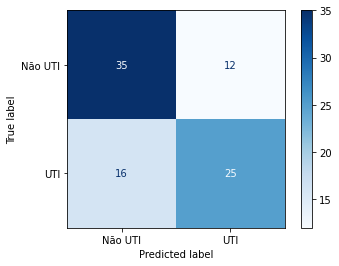

In [62]:
visualiza_metricas(dados_covid, modelo_lr)


O modelo_lr performou melhor na predição de pacientes que não precisaram de UTI, apresentando um recall de 0.74 para este grupo. Já para a classe UTI, o recall é de 0.61 com intervalo de AUC de 0.75 a 0.85.



O parâmetro `solver='liblinear'` é indicado para datasets menores. Visto que o dataset utilizado é relativamente pequeno, decidi testar a perfomance do modelo alterando este parâmetro.

* **Parâmetro `solver`**

In [63]:
#testando o parâmetro 'solver=liblinear'
modelo_lr = LogisticRegression(max_iter=10000, solver='liblinear')
roda_modelos_cv(modelo_lr, dados_covid, 5, 10)

AUC 0.7451636250484934 - 0.8483873898950592


(0.7451636250484934, 0.8483873898950592)

              precision    recall  f1-score   support

     Não UTI       0.71      0.72      0.72        47
         UTI       0.68      0.66      0.67        41

    accuracy                           0.69        88
   macro avg       0.69      0.69      0.69        88
weighted avg       0.69      0.69      0.69        88



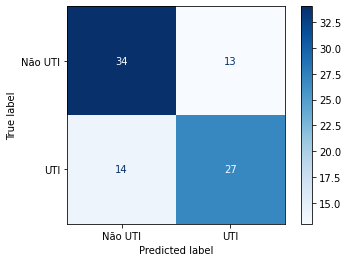

In [64]:
visualiza_metricas(dados_covid, modelo_lr)

> Alterando o parâmetro solver, houve uma melhora na performance do modelo_lr na predição da classe UTI apresentando recall de 0.66, e para a classe não 
UTI, recall de 0.72.



#### Decision Tree Classifier

Método de classificação supervisionado não paramêtrico. 

* **Testando o parâmetro `max_depth`**

In [65]:
#testando a performace do modelo alterando o valor do parâmetro max_depth
teste_lista = []
treino_lista = []
for i in range(1,10):
  modelo_tree = DecisionTreeClassifier(max_depth=i)
  teste, treino = roda_modelos_cv(modelo_tree, dados_covid, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.5811953505539033 - 0.6431012080254496
AUC 0.6498299563019958 - 0.7429478105344617
AUC 0.6683935662636321 - 0.8161665480175943
AUC 0.6576381525065735 - 0.8791053248915707
AUC 0.6318375051187551 - 0.9267215190291179
AUC 0.6109027732876416 - 0.9565721798941322
AUC 0.5947642813267814 - 0.974808984237727
AUC 0.5933300667593431 - 0.9852610114918275
AUC 0.5855786483253589 - 0.991011632180064


Testando o modelo com diferentes valores para o parâmetro max_depth observamos que o valor 3 trouxe os melhores resultados. Aumento esse valor, o modelo passa a performar pior, indicando que níveis mais profundos não são interessantes para esse modelo. Assim, max_depth = 3 foi utilizado para rodar o modelo.

In [66]:
modelo_tree = DecisionTreeClassifier(max_depth=3)
roda_modelos_cv(modelo_tree, dados_covid, 5, 10)

AUC 0.6683935662636321 - 0.8161665480175943


(0.6683935662636321, 0.8161665480175943)

              precision    recall  f1-score   support

     Não UTI       0.65      0.77      0.71        47
         UTI       0.67      0.54      0.59        41

    accuracy                           0.66        88
   macro avg       0.66      0.65      0.65        88
weighted avg       0.66      0.66      0.65        88



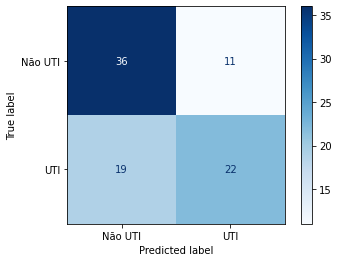

In [67]:
visualiza_metricas(dados_covid, modelo_tree)

> O modelo_tree performou melhor na predição de pacientes que não precisaram de UTI, apresentando um recall de 0.77 para este grupo. Já para a classe UTI, o recall é de 0.54. A acurácia do modelo ficou em um intervalo de AUC de 0.67 a 0.82.

####Random Forest Classifier

**TESTANDO PARÂMETROS**
* **`n_estimators`**

Testando o parâmetro `n_estimator` obtive os seguintes resultados:
```
n_estimator      intervalo_AUC      recall_UTI_class
    10             0.73-0.99                0.59
   100             0.79-1.00                0.71
   200             0.79-1.00                0.73
   300             0.79-1.00                0.73
```
A partir destes resultados, optei por usar `n_estimator=200`.

Os valores obtidos podem ser testados alterando o parâmetro na célula de código abaixo.


In [68]:
modelo_random = RandomForestClassifier(n_estimators=200)
roda_modelos_cv(modelo_random, dados_covid, 5, 10)

AUC 0.7936671771951379 - 1.0


(0.7936671771951379, 1.0)

              precision    recall  f1-score   support

     Não UTI       0.77      0.79      0.78        47
         UTI       0.75      0.73      0.74        41

    accuracy                           0.76        88
   macro avg       0.76      0.76      0.76        88
weighted avg       0.76      0.76      0.76        88



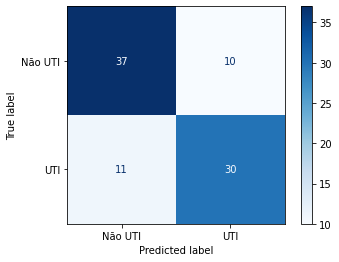

In [69]:
visualiza_metricas(dados_covid, modelo_random)

* **`max_depth`**

In [70]:
#testando o parâmetro max_depth
teste_lista = []
treino_lista = []
for i in range(1,10):
  modelo_random = RandomForestClassifier(max_depth=i, n_estimators=200)
  teste, treino = roda_modelos_cv(modelo_random, dados_covid, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.782951918724945 - 0.8644798516938615
AUC 0.7912809684684686 - 0.900168027093025
AUC 0.7952047502047502 - 0.9373177558946578
AUC 0.7968252403120821 - 0.9671643901531486
AUC 0.7968067185007974 - 0.984525192814763
AUC 0.7964235662097504 - 0.9934163228546921
AUC 0.7982969362903574 - 0.9982648275949583
AUC 0.7937316263632053 - 0.9997414941586075
AUC 0.7956102633734214 - 0.9999817556392293


A melhor performace foi obtida com o parâmetro `max_depth = 7`, o qual será usada para rodar o modelo.

**RODANDO O MODELO COM OS PARÂMETROS ESCOLHIDOS.**

Através dos testes realizados, foram definidos como melhores parâmetros `max_depth=7` e `n_estimators=200`.



In [71]:
modelo_random = RandomForestClassifier(max_depth=7, n_estimators=200)
roda_modelos_cv(modelo_random, dados_covid, 5, 10)

AUC 0.7982969362903574 - 0.9982648275949583


(0.7982969362903574, 0.9982648275949583)

              precision    recall  f1-score   support

     Não UTI       0.79      0.81      0.80        47
         UTI       0.78      0.76      0.77        41

    accuracy                           0.78        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.78      0.78      0.78        88



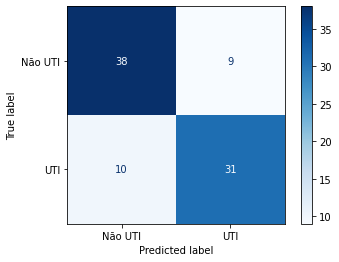

In [72]:
visualiza_metricas(dados_covid, modelo_random)

>O modelo_random performou um pouco melhor na predição de pacientes que não precisaram de UTI, apresentando um recall de 0.81 para este grupo e para a classe UTI, o recall é de 0.76. O intervalo de AUC de 0.79 - 0.99.



#### Gradient Boosting Classifier

**TESTANDO PARÂMETROS**
* **`n_estimators`**

Testando o parâmetro `n_estimator` obtive os seguintes resultados:
```
n_estimator      intervalo_AUC      recall_UTI_class
    10             0.74-0.94                0.59
   100             0.77-1.00                0.61
   200             0.77-1.00                0.66
   300             0.76-1.00                0.66
```
A partir destes resultados, optei por usar `n_estimator=200`.

Os valores obtidos podem ser testados alterando o parâmetro na célula de código abaixo.


In [73]:
modelo_grad_boost = GradientBoostingClassifier(n_estimators=200)
roda_modelos_cv(modelo_grad_boost, dados_covid, 5, 10)

AUC 0.7706844449114186 - 1.0


(0.7706844449114186, 1.0)

              precision    recall  f1-score   support

     Não UTI       0.72      0.77      0.74        47
         UTI       0.71      0.66      0.68        41

    accuracy                           0.72        88
   macro avg       0.72      0.71      0.71        88
weighted avg       0.72      0.72      0.71        88



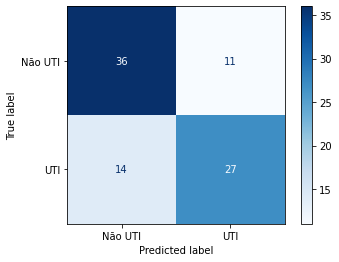

In [74]:
visualiza_metricas(dados_covid, modelo_grad_boost)

* **`max_depth`**


In [75]:
#testando o parâmetros max_depth
teste_lista = []
treino_lista = []
for i in range(1,5):
  modelo_grad_boost = GradientBoostingClassifier(max_depth=i, n_estimators=200)
  teste, treino = roda_modelos_cv(modelo_grad_boost, dados_covid, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.7521803876244667 - 0.9583227152092745
AUC 0.7666582207207209 - 0.9999827811908822
AUC 0.7706844449114186 - 1.0
AUC 0.767218508879693 - 1.0


In [76]:
modelo_grad_boost = GradientBoostingClassifier(max_depth=3, n_estimators=200)
roda_modelos_cv(modelo_grad_boost, dados_covid, 5, 10)

AUC 0.7706844449114186 - 1.0


(0.7706844449114186, 1.0)

              precision    recall  f1-score   support

     Não UTI       0.72      0.77      0.74        47
         UTI       0.71      0.66      0.68        41

    accuracy                           0.72        88
   macro avg       0.72      0.71      0.71        88
weighted avg       0.72      0.72      0.71        88



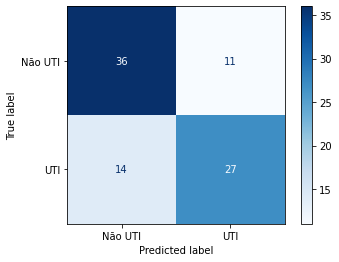

In [77]:
visualiza_metricas(dados_covid, modelo_grad_boost)

Usando `n_estimator=200`, obtive um valor de `max_depth=3`. Aplicando estes parâmetros, obtive um valor de recall menor para a classe não UTI e nenhuma diferença na classe UTI. Sendo assim, optei por especificar apenas o valor de `max_depth` utilizando o valor obtido no segundo teste descrito abaixo.

In [78]:
#testando o parâmetro max_depth
teste_lista = []
treino_lista = []
for i in range(1,5):
  modelo_grad_boost = GradientBoostingClassifier(max_depth=i)
  teste, treino = roda_modelos_cv(modelo_grad_boost, dados_covid, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.7647551955364456 - 0.9192928959249531
AUC 0.7774834583387215 - 0.9953059149508987
AUC 0.7760229697400751 - 1.0
AUC 0.7754936096383465 - 1.0


A melhor performace foi obtida com o parâmetro `max_depth = 2`, o qual será usada para rodar o modelo.

In [79]:
modelo_grad_boost = GradientBoostingClassifier(max_depth=2)
roda_modelos_cv(modelo_grad_boost, dados_covid, 5, 10)

AUC 0.7774834583387215 - 0.9953059149508987


(0.7774834583387215, 0.9953059149508987)

              precision    recall  f1-score   support

     Não UTI       0.73      0.79      0.76        47
         UTI       0.73      0.66      0.69        41

    accuracy                           0.73        88
   macro avg       0.73      0.72      0.72        88
weighted avg       0.73      0.73      0.73        88



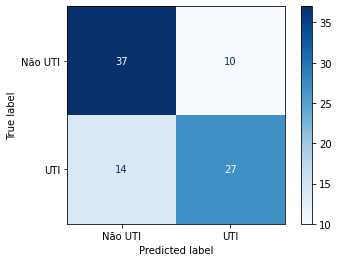

In [80]:
visualiza_metricas(dados_covid, modelo_grad_boost)

> O modelo_grad_boost performou melhor na predição de pacientes que não precisaram de UTI, apresentando um recall de 0.79 para este grupo. Já para a classe UTI, o recall é de 0.66. O intervalo de AUC de 0.77 - 0.99 apresentado pelo modelo é bastante alto, indicando que, possívelmente, há algum desajuste.



#### Resumo e Conclusão parciais

In [81]:
#Rodando os modelos testados com os parâmetros definidos para cada um.
modelo_dummy = DummyClassifier(strategy="most_frequent")
print(f'Modelo DummyClassifier - resultado:')
roda_modelos_cv(modelo_dummy, dados_covid, 5, 10)

modelo_lr = LogisticRegression(max_iter=10000, solver='liblinear')
print(f'Modelo LogisticRegression - resultado:')
roda_modelos_cv(modelo_lr, dados_covid, 5, 10)

modelo_tree = DecisionTreeClassifier(max_depth=3)
print(f'Modelo DecisionTreeClassifier - resultado:')
roda_modelos_cv(modelo_tree, dados_covid, 5, 10)

modelo_random = RandomForestClassifier(max_depth=7, n_estimators=200)
print(f'Modelo RandomForestClassifier - resultado:')
roda_modelos_cv(modelo_random, dados_covid, 5, 10)

modelo_grad_boost = GradientBoostingClassifier(max_depth=2)
print(f'Modelo GradientBoostingClassifier - resultado:')
roda_modelos_cv(modelo_grad_boost, dados_covid, 5, 10)

Modelo DummyClassifier - resultado:
AUC 0.5 - 0.5
Modelo LogisticRegression - resultado:
AUC 0.7451636250484934 - 0.8483873898950592
Modelo DecisionTreeClassifier - resultado:
AUC 0.6683935662636321 - 0.8161665480175943
Modelo RandomForestClassifier - resultado:
AUC 0.7982969362903574 - 0.9982648275949583
Modelo GradientBoostingClassifier - resultado:
AUC 0.7774834583387215 - 0.9953059149508987


(0.7774834583387215, 0.9953059149508987)

Observando os dados acima, é possível verificar os 3 modelos que melhor performaram, apresentando os maiores valores de AUC.
```
                                   Intervalo AUC
1º RandomForestClassifier           0.798-0.998
2º GradientBoostingClassifier       0.777-0.995
3º LogisticRegression               0.745-0.848
```
As métricas `classification report` e `confusion matrix` mostraram que todos os modelos são melhores em classificar corretamente os pacientes que não precisaram de UTI. 

Essa é uma importante observação, visto que a predição incorreta de paciente que necessitarão de UTI (falso negativo) pode gerar problemas como falta de recursos, indiponibilidade de leitos, dentro outros. Ou seja, pode gerar exatamente o problema que precisa ser evitado. Por outro lado, uma previsão incorreta de pacientes que não precisarão de UTI (falso positivo) não gera problemas como falta de leito, no entanto, pode gerar problemas como alocação errada de recursos e desperdício de verba, que também impactam negativamente.

Sendo assim, para o problema em questão, o melhor modelo é aquele que apresentam maior precisão na predição de pacientes que necessitarão de UTI.







### Dataset Sírio-Libanês

Utilizando o dataset original tratado (dados_covid), selecionei 3 modelos que melhor perfomaram. Estes modelos foram novamente testados utilizando o dataset criado a partir da função criada pelo time do Sírio-Libanês (dados_covid_sirio).

In [82]:
#rodando o modelo Dammy para fins de comparação
modelo_dummy_sirio = DummyClassifier(strategy="most_frequent")
roda_modelos_cv(modelo_dummy_sirio, dados_covid, 5, 10)

AUC 0.5 - 0.5


(0.5, 0.5)

#### Logistic regression

In [83]:
modelo_lr_sirio = LogisticRegression(max_iter=10000, solver='lbfgs')
roda_modelos_cv(modelo_lr_sirio, dados_covid_sirio, 5, 10)

AUC 0.748173304883831 - 0.7899609486529319


(0.748173304883831, 0.7899609486529319)

              precision    recall  f1-score   support

     Não UTI       0.69      0.81      0.75        47
         UTI       0.73      0.59      0.65        41

    accuracy                           0.70        88
   macro avg       0.71      0.70      0.70        88
weighted avg       0.71      0.70      0.70        88



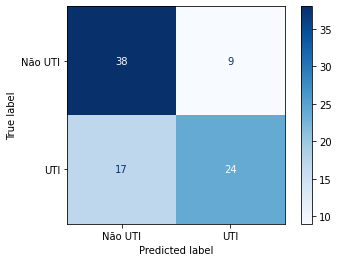

In [84]:
visualiza_metricas(dados_covid_sirio, modelo_lr_sirio)

> O parâmetro `solver='lbfgs'`permitiu uma melhor performance do modelo. Assim como observado para os dados originais, o modelo performou melhor para a classe 'Não UTI', apresentando recall de 0.81.

#### Decision Tree Classifier

In [85]:
#testando a performace do modelo alterando o valor do parâmetro max_depth
teste_lista = []
treino_lista = []
for i in range(1,20):
  modelo_tree_sirio = DecisionTreeClassifier(max_depth=i)
  teste, treino = roda_modelos_cv(modelo_tree_sirio, dados_covid_sirio, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.5940524376050691 - 0.6427353309733483
AUC 0.6822563607267556 - 0.7438110377459088
AUC 0.6950317968985733 - 0.8010609326732988
AUC 0.6950253849842665 - 0.8538045255466387
AUC 0.6675550333527308 - 0.9006544112740991
AUC 0.6567219020755205 - 0.937194206546502
AUC 0.6426155087503771 - 0.9637463135810813
AUC 0.6245894286930471 - 0.9802014052355069
AUC 0.619382732014311 - 0.9905736733476508
AUC 0.6219906299840511 - 0.9953830460495872
AUC 0.62693973204664 - 0.9979281581444346
AUC 0.6249072158282685 - 0.9992356393603071
AUC 0.6253549991378938 - 0.9997322041997526
AUC 0.6276323265550239 - 0.9999721223203798
AUC 0.630108409845252 - 0.999995924605196
AUC 0.6295820940557783 - 0.9999994905756495
AUC 0.6293348851243588 - 1.0
AUC 0.6293348851243588 - 1.0
AUC 0.6293348851243588 - 1.0


In [86]:
modelo_tree_sirio = DecisionTreeClassifier(max_depth=15)
roda_modelos_cv(modelo_tree_sirio, dados_covid_sirio, 5, 10)

AUC 0.630108409845252 - 0.999995924605196


(0.630108409845252, 0.999995924605196)

              precision    recall  f1-score   support

     Não UTI       0.68      0.68      0.68        47
         UTI       0.63      0.63      0.63        41

    accuracy                           0.66        88
   macro avg       0.66      0.66      0.66        88
weighted avg       0.66      0.66      0.66        88



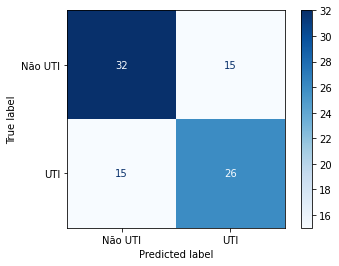

In [87]:
visualiza_metricas(dados_covid_sirio, modelo_tree_sirio)

#### Random Forest Classifier



In [88]:
#testando o parâmetro max_depth
teste_lista = []
treino_lista = []
for i in range(1,5):
  modelo_random_sirio = RandomForestClassifier(max_depth=i)
  teste, treino = roda_modelos_cv(modelo_random_sirio, dados_covid_sirio, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.769504672884607 - 0.817676415479255
AUC 0.7705079219470666 - 0.8481963291309065
AUC 0.7735802459157722 - 0.8828509758270061
AUC 0.7729954954954955 - 0.9185870723695725


In [89]:
modelo_random_sirio = RandomForestClassifier(max_depth=7, n_estimators=200)
roda_modelos_cv(modelo_random_sirio, dados_covid_sirio, 5, 10)

AUC 0.7704809205138153 - 0.9896989380886702


(0.7704809205138153, 0.9896989380886702)

Testei o modelo com diferentes valores de `max_depth` e, também, o modelo com os mesmo parâmetros usados para o dataset anterior (dados_covid) e obtive resultados iguais em todos os casos.


              precision    recall  f1-score   support

     Não UTI       0.72      0.83      0.77        47
         UTI       0.76      0.63      0.69        41

    accuracy                           0.74        88
   macro avg       0.74      0.73      0.73        88
weighted avg       0.74      0.74      0.74        88



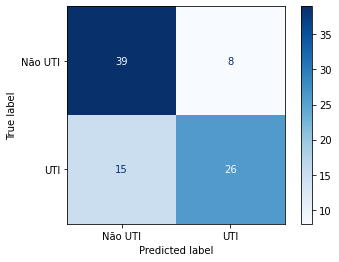

In [90]:
visualiza_metricas(dados_covid_sirio, modelo_random_sirio)

O modelo mostrou melhor performance para a classe 'Não UTI', apresentando valor de recall de 0.83.

#### Gradient Boosting Classifier

In [91]:
#testando o parâmetros max_depth
teste_lista = []
treino_lista = []
for i in range(1,8):
  modelo_grad_boost_sirio = GradientBoostingClassifier(max_depth=i)
  teste, treino = roda_modelos_cv(modelo_grad_boost_sirio, dados_covid_sirio, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

AUC 0.7470436293051425 - 0.8684823640216647
AUC 0.7460047375425666 - 0.9625843936448238
AUC 0.7422818063278589 - 0.9980961330209517
AUC 0.7407010673951463 - 1.0
AUC 0.7438477008707273 - 1.0
AUC 0.7366871955687745 - 1.0
AUC 0.736527598172335 - 1.0


In [92]:
modelo_grad_boost_sirio = GradientBoostingClassifier(max_depth=3)
roda_modelos_cv(modelo_grad_boost_sirio, dados_covid_sirio, 5, 10)

AUC 0.7422818063278589 - 0.9980961330209517


(0.7422818063278589, 0.9980961330209517)

              precision    recall  f1-score   support

     Não UTI       0.73      0.79      0.76        47
         UTI       0.73      0.66      0.69        41

    accuracy                           0.73        88
   macro avg       0.73      0.72      0.72        88
weighted avg       0.73      0.73      0.73        88



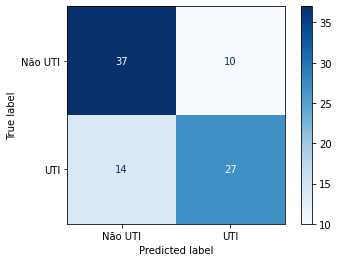

In [93]:
visualiza_metricas(dados_covid, modelo_grad_boost)

#### Resumo e Conclusão parciais

In [94]:
#Rodando os modelos testados com os parâmetros definidos para cada um.
modelo_lr_sirio = LogisticRegression(max_iter=10000, solver='lbfgs')
print(f'Modelo LogisticRegression - resultado:')
roda_modelos_cv(modelo_lr_sirio, dados_covid_sirio, 5, 10)

modelo_tree_sirio = DecisionTreeClassifier(max_depth=15)
print(f'Modelo DecisionTreeClassifier - resultado:')
roda_modelos_cv(modelo_tree_sirio, dados_covid_sirio, 5, 10)

modelo_random_sirio = RandomForestClassifier(max_depth=7, n_estimators=200)
print(f'Modelo RandomForestClassifier - resultado:')
roda_modelos_cv(modelo_random_sirio, dados_covid_sirio, 5, 10)

modelo_grad_boost_sirio = GradientBoostingClassifier(max_depth=3)
print(f'Modelo GradientBoostingClassifier - resultado:')
roda_modelos_cv(modelo_grad_boost_sirio, dados_covid_sirio, 5, 10)

Modelo LogisticRegression - resultado:
AUC 0.748173304883831 - 0.7899609486529319
Modelo DecisionTreeClassifier - resultado:
AUC 0.630108409845252 - 0.999995924605196
Modelo RandomForestClassifier - resultado:
AUC 0.7704809205138153 - 0.9896989380886702
Modelo GradientBoostingClassifier - resultado:
AUC 0.7422818063278589 - 0.9980961330209517


(0.7422818063278589, 0.9980961330209517)

Observando os dados acima, é possível verificar os 3 modelos que melhor performaram, apresentando os maiores valores de intervalos de AUC.
```
                                   Intervalo AUC
1º GradientBoostingClassifier       0.740-0.998
2º RandomForestClassifier           0.770-0.989
3º LogisticRegression               0.748-0.789
```
As métricas `classification report` e `confusion matrix` mostraram que todos os modelos são melhores em classificar corretamente os pacientes que não precisaram de UTI. 

Apesar do modelo `GradientBoostingClassifier` apresentar um intervalo de AUC maior, ele apresentou valor de recall de 0.66 para a classe  UTI, sendo este, o maior valor entre os três modelos.

O modelo `RandomForestClassifier` apresentou valor de recall de 0.83 para a classe 'Não UTI' e 0.63 para a classe 'UTI'. Como dito anteriormente, uma predição melhor do verdadeiro positivo (classe UTI) é melhor. Por isso, em minha avaliação, o modelo Random Forest Classifier ficou em segundo lugar.




### Comparação entre os datasets

Ao separar os conjuntos de dados para avaliar separadamente, eu esperava encontrar diferenças considerável na performance dos modelos. O dataset original após processamento apresenta um total de 61 features, enquando o dataset Sirio-Libanês apresenta um total de 18 features.

No entanto, os modelos performaram de modo muito semelhante para ambos os conjuntos de dados. Apesar do número de features contidas nos dois conjuntos de dados serem muito diferentes, não foi possível identificar aquelas que maior pesos.

Comparando dos valores de AUC obtidos para cada modelo usando os dois conjuntos de dados (mostrados na tabela abaixo), os valores obtidos utilizando o conjunto de dados original são um pouco maiores para cada modelo. Isso me leva a concluir que o uso de um maior número de features foi melhor para o desempenho do modelo.

```
                                          Intervalo AUC
                                 Dado Original        Dado Sírio   
RandomForestClassifier           0.798-0.998         0.770-0.989
GradientBoostingClassifier       0.777-0.995         0.740-0.998
LogisticRegression               0.745-0.848         0.748-0.789
```
 Estes foram os 3 modelos com melhor desempenho para ambos conjuntos de dados.

## **Conclusão**

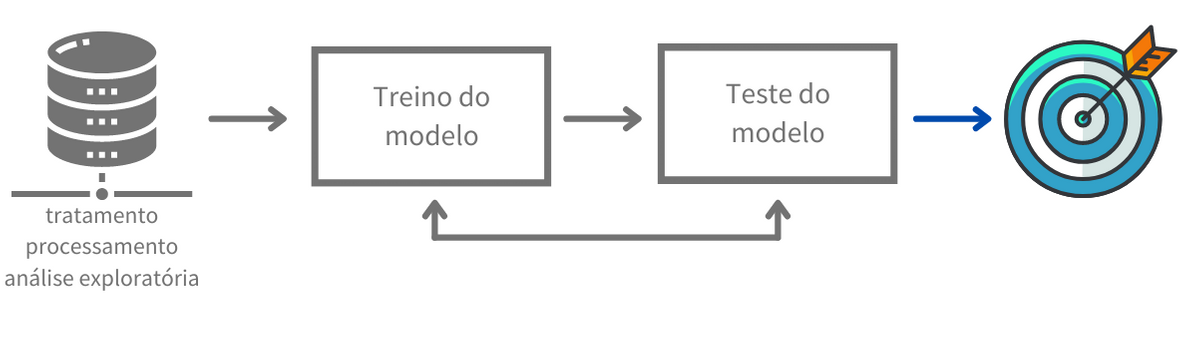


Os dados avaliados deixam claro que pacientes acima de 60 anos tem maior probabilidade de necessitarem de UTI decorrente do agravamento da coença COVID-19. Os pacientes do gênero masculino se destacam nesse cenário, sendo importante o monitoramento frequente da pressão arterial e da frequência respiratória, sinal vital que pode indicar alterações na saturação de oxigênio.

Exames de sangue e monitoramento de sinais vitais dos pacientes são muito importantes para avaliar o estado de saúde dos pacientes, e alguns são especialmente relevantes. No entanto, para a construção de um bom modelo para prever com antencedência a necessidade de UTI, a seleção destas variáveis não mostrou-se relevante. Os resultados obtidos foram semelhantes tanto para o uso dos dados com a seleção de *features* (dataset dados_covid_sirio) quanto para os dados originais processados(dataset dados_covid).

O modelo Random Forest Classifier foi o de melhor desempenho, apresentando intervalo de AUC de 0.798 a 0.998 e recall (taxa de previsões corretas) para a classe UTI de 0.76. No entanto, este modelo, assim como os outros testados, foram mais eficientes na predição de pacientes que não precisaram de UTI.

A predição incorreta de paciente que necessitarão de UTI (falso negativo) pode gerar problemas como falta de recursos, indiponibilidade de leitos, dentro outros. Ou seja, pode gerar exatamente o problema que precisa ser evitado. Por outro lado, uma previsão incorreta de pacientes que não precisarão de UTI (falso positivo) não gera problemas como falta de leito, no entanto, pode gerar problemas como alocação errada de recursos e desperdício de verba, que também impactam negativamente.

Sendo assim, apesar de apresentar um bom desempenho, o modelo Random Forest Classifier não é o modelo ideal para predição de pacientes que necessitarão de UTI.


## **Referência**

* Tipos de teste de COVID-19 - https://cura.com.br/tipos-teste-covid/#:~:text=Princ%C3%ADpio%3A%20Detecta%20e%20quantifica%20a%20presen%C3%A7a%20de%20anticorpos%20IgA%20e,pelo%20SARS%2DCOV%2D2.
* BATIMENTOS CARDÍACOS NORMAIS POR IDADE: COMO AVALIAR E QUANDO DEVO ME PREOCUPAR? - https://conteudo.omronbrasil.com/o-que-e-pressao-arterial-sistolica/#:~:text=Por%20sua%20vez%2C%20a%20press%C3%A3o%20arterial%20diast%C3%B3lica%20(tamb%C3%A9m%20abordaremos%20a,dizemos%20que%20ela%20est%C3%A1%20alta.
* Respiratory Rate - https://en.wikipedia.org/wiki/Respiratory_rate
* Sobre oximetro e COVID-19 - https://pfarma.com.br/coronavirus/5560-oximetro.html
* Heart Rate - https://en.wikipedia.org/wiki/Heart_rate
* *p*-Value - https://en.wikipedia.org/wiki/P-value
* Z-test - https://en.wikipedia.org/wiki/Z-test
* Understanding a Classification Report For Your Machine Learning Model - https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397
* Documentação Sklearn F1-score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
* Metrics and scoring: quantifying the quality of predictions - https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators
* Confusion Matrix -
https://en.wikipedia.org/wiki/Confusion_matrix
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
* Cross-validation - https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* A Gentle Introduction to k-fold Cross-Validation - https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,k%2Dfold%20cross%2Dvalidation.
* Cross-validation: evaluating estimator performance - https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
* Python Pandas – get_dummies() method - https://www.geeksforgeeks.org/python-pandas-get_dummies-method/
* Overfitting e underfitting em Machine Learnin - https://abracd.org/overfitting-e-underfitting-em-machine-learning/
* Cross-validation: evaluating estimator performance - https://scikit-learn.org/stable/modules/cross_validation.html
* A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning - https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/
* Decision tree learning - https://en.wikipedia.org/wiki/Decision_tree_learning
* 